# Prepare Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

df_policies = pd.read_csv("../data/climate_policy_database_policies_export.csv")

# drop unused columns
df_policies = df_policies.drop(columns=[
    "policy_id", 
    "policy_name", 
    "supranational_region", 
    "subnational_region", 
    "policy_city_or_local",
    # "policy_description",
    "stringency",
    "high_impact",
    "reference",
    "last_update",
    "impact_indicators.comments",
    "impact_indicators.name",
    "impact_indicators.value",
    "impact_indicators.base_year",
    "impact_indicators.target_year"
])

# function to convert string to list
def string_to_list(cell):
    return cell.split(",")

# convert string to list
df_policies["policy_instrument"] = df_policies["policy_instrument"].apply(string_to_list)
df_policies["sector"] = df_policies["sector"].apply(string_to_list)
df_policies["policy_type"] = df_policies["policy_type"].apply(string_to_list)
df_policies["policy_objective"] = df_policies["policy_objective"].apply(string_to_list)

# fill na
df_policies['start_date'] = df_policies['start_date'].fillna(df_policies['decision_date'])
df_policies['end_date'] = df_policies['end_date'].fillna(pd.Timestamp('now').year)
df_policies = df_policies.dropna(subset='start_date')

# load mapping region
df_region = pd.read_csv("../data/region_mapping.csv")
df_region.head()

# merge region
df_policies = df_policies.merge(df_region, left_on='country_iso', right_on='alpha-3', how='left')
print(f"Number of policies: {len(df_policies)}")
df_policies.head()

Number of policies: 6247


country_iso country_update  \
0         ARE         Annual   
1         KAZ         Annual   
2         FRA       Sporadic   
3         BTN         Annual   
4         CAN         Annual   

                                        policy_title jurisdiction  \
0  National Hydrogen Strategy United Arab Emirate...      Country   
1               Environmental Code Kazakhstan (2021)      Country   
2   Energy Policy Framework (POPE, No. France (2005)      Country   
3                      Electricity Act Bhutan (2001)      Country   
4  GHGs Formally Designated as Pollutants Canada ...      Country   

                country                                  policy_instrument  \
0  United Arab Emirates              [Policy support,  Strategic planning]   
1            Kazakhstan      [Regulatory Instruments,  Obligation schemes]   
2                France  [RD&D funding,  Tax relief,  White certificate...   
3                Bhutan  [Policy support,  Institutional creation,  Str...   
4                Canada                           [Regulatory Instruments]   

                                          sector  \
0  [Electricity and heat,  Industry,  Transport]   
1                                      [General]   
2               [Buildings,  General,  Industry]   
3                         [Electricity and heat]   
4                                      [General]   

                                  policy_description  \
0  The National Hydrogen Strategy 2050 aims to su...   
1  The code regulates activities which may have a...   
2  • Reduce energy intensity by 2% annually betwe...   
3                                                NaN   
4                                                NaN   

                                         policy_type policy_status  ...  \
0    [Other low-carbon technologies and fuel switch]      In force  ...   
1  [Energy service demand reduction and resource ...      In force  ...   
2  [Energy service demand reduction and resource ...      In force  ...   
3                   [Energy efficiency,  Renewables]      In force  ...   
4  [Energy service demand reduction and resource ...      In force  ...   

   alpha-2  alpha-3  country-code     iso_3166-2    region        sub-region  \
0       AE      ARE         784.0  ISO 3166-2:AE      Asia      Western Asia   
1       KZ      KAZ         398.0  ISO 3166-2:KZ      Asia      Central Asia   
2       FR      FRA         250.0  ISO 3166-2:FR    Europe    Western Europe   
3       BT      BTN          64.0  ISO 3166-2:BT      Asia     Southern Asia   
4       CA      CAN         124.0  ISO 3166-2:CA  Americas  Northern America   

  intermediate-region  region-code sub-region-code intermediate-region-code  
0                 NaN        142.0           145.0                      NaN  
1                 NaN        142.0           143.0                      NaN  
2                 NaN        150.0           155.0                      NaN  
3                 NaN        142.0            34.0                      NaN  
4                 NaN         19.0            21.0                      NaN  

[5 rows x 25 columns]

In [2]:
import datetime

# Function to create a range of years from start_date to end_date,
# handling NaN values, end_date = 0, and ensuring it doesn't exceed the current year
def create_year_range(row):
    current_year = datetime.datetime.now().year
    if pd.isna(row['start_date']) or pd.isna(row['end_date']) or row['end_date'] == 0:
        return []
    start_year = int(row['start_date'])
    end_year = min(int(row['end_date']), current_year)  # Limit the end year to the current year
    if start_year > end_year:  # Also check if start year is greater than end year
        return []
    return list(range(start_year, end_year + 1))

# Apply the function to each row
df_policies['active_years'] = df_policies.apply(create_year_range, axis=1)

# Explode the 'active_years' list into multiple rows
df_policies = df_policies.explode('active_years')

# Drop rows where 'active_year' is NaN which results from empty lists or incorrect year ranges
df_policies = df_policies.dropna(subset=['active_years'])

# Rename the column for clarity and convert 'active_year' to integer
df_policies.rename(columns={'active_years': 'active_year'}, inplace=True)
df_policies['active_year'] = df_policies['active_year'].astype(int)

# Display the first few rows to verify
df_policies.head()

country_iso country_update  \
0         ARE         Annual   
0         ARE         Annual   
1         KAZ         Annual   
1         KAZ         Annual   
1         KAZ         Annual   

                                        policy_title jurisdiction  \
0  National Hydrogen Strategy United Arab Emirate...      Country   
0  National Hydrogen Strategy United Arab Emirate...      Country   
1               Environmental Code Kazakhstan (2021)      Country   
1               Environmental Code Kazakhstan (2021)      Country   
1               Environmental Code Kazakhstan (2021)      Country   

                country                              policy_instrument  \
0  United Arab Emirates          [Policy support,  Strategic planning]   
0  United Arab Emirates          [Policy support,  Strategic planning]   
1            Kazakhstan  [Regulatory Instruments,  Obligation schemes]   
1            Kazakhstan  [Regulatory Instruments,  Obligation schemes]   
1            Kazakhstan  [Regulatory Instruments,  Obligation schemes]   

                                          sector  \
0  [Electricity and heat,  Industry,  Transport]   
0  [Electricity and heat,  Industry,  Transport]   
1                                      [General]   
1                                      [General]   
1                                      [General]   

                                  policy_description  \
0  The National Hydrogen Strategy 2050 aims to su...   
0  The National Hydrogen Strategy 2050 aims to su...   
1  The code regulates activities which may have a...   
1  The code regulates activities which may have a...   
1  The code regulates activities which may have a...   

                                         policy_type policy_status  ...  \
0    [Other low-carbon technologies and fuel switch]      In force  ...   
0    [Other low-carbon technologies and fuel switch]      In force  ...   
1  [Energy service demand reduction and resource ...      In force  ...   
1  [Energy service demand reduction and resource ...      In force  ...   
1  [Energy service demand reduction and resource ...      In force  ...   

   alpha-3  country-code     iso_3166-2 region    sub-region  \
0      ARE         784.0  ISO 3166-2:AE   Asia  Western Asia   
0      ARE         784.0  ISO 3166-2:AE   Asia  Western Asia   
1      KAZ         398.0  ISO 3166-2:KZ   Asia  Central Asia   
1      KAZ         398.0  ISO 3166-2:KZ   Asia  Central Asia   
1      KAZ         398.0  ISO 3166-2:KZ   Asia  Central Asia   

  intermediate-region region-code  sub-region-code intermediate-region-code  \
0                 NaN       142.0            145.0                      NaN   
0                 NaN       142.0            145.0                      NaN   
1                 NaN       142.0            143.0                      NaN   
1                 NaN       142.0            143.0                      NaN   
1                 NaN       142.0            143.0                      NaN   

  active_year  
0        2023  
0        2024  
1        2021  
1        2022  
1        2023  

[5 rows x 26 columns]

## Mapping Sector

In [3]:
# Define the sector groupings
sector_group_mapping = {
    'Electricity and heat': 'Energy Production and Supply',
    'Renewables': 'Energy Production and Supply',
    'Gas': 'Energy Production and Supply',
    'Coal': 'Energy Production and Supply',
    'Nuclear': 'Energy Production and Supply',
    'Oil': 'Energy Production and Supply',
    'Fossil fuel exploration and production': 'Energy Production and Supply',
    
    'Transport': 'Transportation',
    'Light-duty vehicles': 'Transportation',
    'Low-emissions mobility': 'Transportation',
    'Heavy-duty vehicles': 'Transportation',
    'Shipping': 'Transportation',
    'Rail': 'Transportation',
    'Air': 'Transportation',
    
    'Buildings': 'Buildings and Infrastructure',
    'Appliances': 'Buildings and Infrastructure',
    'Heating and cooling': 'Buildings and Infrastructure',
    'Hot water and cooking': 'Buildings and Infrastructure',
    'Construction': 'Buildings and Infrastructure',
    
    'Industry': 'Industrial Processes',
    'Industrial energy related': 'Industrial Processes',
    'Industrial process CO2': 'Industrial Processes',
    'Industrial N2O': 'Industrial Processes',
    
    'Agriculture and forestry': 'Agriculture and Forestry',
    'Forestry': 'Agriculture and Forestry',
    'Agricultural CH4': 'Agriculture and Forestry',
    'Agricultural CO2': 'Agriculture and Forestry',
    'Agricultural N2O': 'Agriculture and Forestry',
    
    'Waste CH4': 'Waste Management',
    
    'Fluorinated gases': 'Emission Reduction Technologies',
    'CCS': 'Emission Reduction Technologies',
    'Negative emissions': 'Emission Reduction Technologies',
    
    'General': 'General'
}

exploded = df_policies.explode("sector")
exploded["sector"] = exploded["sector"].str.strip()

# Map sectors to their respective groups
exploded["sector_group"] = exploded["sector"].map(sector_group_mapping)

# Display the grouped sectors and their counts
sector_group_counts = exploded["sector_group"].value_counts()

# Display the resulting DataFrame for verification
print(sector_group_counts)

sector_group
Energy Production and Supply       50855
Transportation                     27820
Buildings and Infrastructure       27512
General                            20038
Industrial Processes               14453
Agriculture and Forestry           11716
Emission Reduction Technologies     1962
Waste Management                     684
Name: count, dtype: int64


## Mapping Policy Instrument

In [4]:
# Define the policy instrument groupings
policy_instrument_group_mapping = {
    # Support and Strategic Measures
    'Policy support': 'Support and Strategic Measures',
    'Strategic planning': 'Support and Strategic Measures',
    'Institutional creation': 'Support and Strategic Measures',
    'Monitoring': 'Support and Strategic Measures',
    'Infrastructure investments': 'Support and Strategic Measures',
    'Funds to sub-national governments': 'Support and Strategic Measures',
    'Advice or aid in implementation': 'Support and Strategic Measures',
    'Professional training and qualification': 'Support and Strategic Measures',
    'Negotiated agreements (public-private sector)': 'Support and Strategic Measures',
    'Voluntary approaches': 'Support and Strategic Measures',
    'Public voluntary schemes': 'Support and Strategic Measures',
    'Unilateral commitments (private sector)': 'Support and Strategic Measures',
    'Auditing': 'Support and Strategic Measures',
    'Barrier removal': 'Support and Strategic Measures',
    'Removal of split incentives (landlord tenant problem)': 'Support and Strategic Measures',

    # Regulatory Instruments
    'Codes and standards': 'Regulatory Instruments',
    'Sectoral standards': 'Regulatory Instruments',
    'Building codes and standards': 'Regulatory Instruments',
    'Product standards': 'Regulatory Instruments',
    'Industrial air pollution standards': 'Regulatory Instruments',
    'Vehicle fuel-economy and emissions standards': 'Regulatory Instruments',
    'Vehicle air pollution standards': 'Regulatory Instruments',
    'Procurement rules': 'Regulatory Instruments',
    'Other mandatory requirements': 'Regulatory Instruments',
    'Obligation schemes': 'Regulatory Instruments',
    'Grid access and priority for renewables': 'Regulatory Instruments',
    'Feed-in tariffs or premiums': 'Regulatory Instruments',
    'Regulatory Instruments': 'Regulatory Instruments',
    'User charges': 'Regulatory Instruments',

    # Economic Instruments
    'Economic instruments': 'Economic Instruments',
    'Grants and subsidies': 'Economic Instruments',
    'Fiscal or financial incentives': 'Economic Instruments',
    'Tax relief': 'Economic Instruments',
    'Energy and other taxes': 'Economic Instruments',
    'Loans': 'Economic Instruments',
    'Direct investment': 'Economic Instruments',
    'Market-based instruments': 'Economic Instruments',
    'GHG emission reduction crediting and offsetting mechanism': 'Economic Instruments',
    'GHG emissions allowances': 'Economic Instruments',
    'White certificates': 'Economic Instruments',
    'Green certificates': 'Economic Instruments',
    'CO2 taxes': 'Economic Instruments',
    'Retirement premium': 'Economic Instruments',
    'Net metering': 'Economic Instruments',
    'Removal of fossil fuel subsidies': 'Economic Instruments',
    'Tendering schemes': 'Economic Instruments',

    # Targets and Commitments
    'Renewable energy target': 'Targets and Commitments',
    'Energy efficiency target': 'Targets and Commitments',
    'GHG reduction target': 'Targets and Commitments',
    'Formal & legally binding renewable energy target': 'Targets and Commitments',
    'Formal & legally binding energy efficiency target': 'Targets and Commitments',
    'Formal & legally binding GHG reduction target': 'Targets and Commitments',
    'Political & non-binding renewable energy target': 'Targets and Commitments',
    'Political & non-binding energy efficiency target': 'Targets and Commitments',
    'Political & non-binding GHG reduction target': 'Targets and Commitments',
    'Climate strategy': 'Targets and Commitments',
    'Formal & legally binding climate strategy': 'Targets and Commitments',
    'Target': 'Targets and Commitments',
    'Political & non-binding climate strategy': 'Targets and Commitments',

    # Research, Development, and Innovation
    'Research & Development and Deployment (RD&D)': 'Research, Development, and Innovation',
    'RD&D funding': 'Research, Development, and Innovation',
    'Research programme': 'Research, Development, and Innovation',
    'Technology development': 'Research, Development, and Innovation',
    'Technology deployment and diffusion': 'Research, Development, and Innovation',
    'Demonstration project': 'Research, Development, and Innovation',

    # Information and Education
    'Information and education': 'Information and Education',
    'Information provision': 'Information and Education',
    'Performance label': 'Information and Education',
    'Endorsement label': 'Information and Education',
    'Comparison label': 'Information and Education'
}

exploded = exploded.explode("policy_instrument")
exploded["policy_instrument"] = exploded["policy_instrument"].str.strip()

# Map sectors to their respective groups
exploded["policy_instrument_group"] = exploded["policy_instrument"].map(policy_instrument_group_mapping)

# Display the grouped sectors and their counts
policy_instrument_group_counts = exploded["policy_instrument_group"].value_counts()

# Display the resulting DataFrame for verification
print(policy_instrument_group_counts)

policy_instrument_group
Support and Strategic Measures           99932
Regulatory Instruments                   79035
Economic Instruments                     70331
Targets and Commitments                  46489
Research, Development, and Innovation    31580
Information and Education                30313
Name: count, dtype: int64


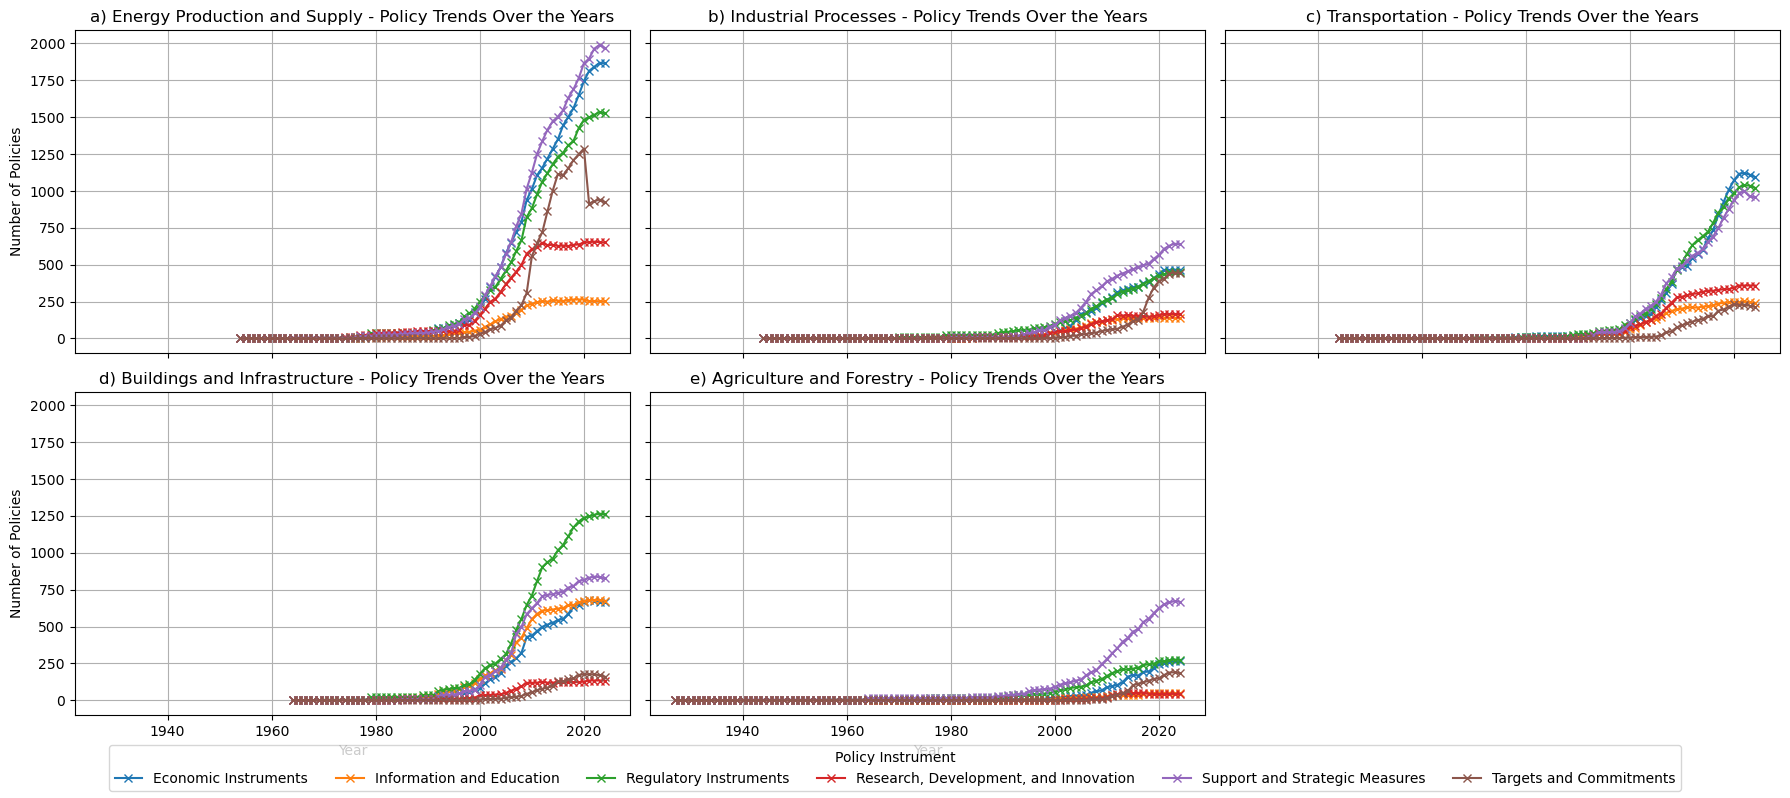

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Exploding and filtering the DataFrame
s_exploded_df = exploded.explode("policy_instrument")
s_exploded_df["policy_instrument"] = s_exploded_df["policy_instrument"].str.strip()

# Exclude the 'General' sector group
sector_groups = s_exploded_df['sector_group'].unique()
sector_groups = [sg for sg in sector_groups if sg != 'General']

# Create a figure with subplots (3 subplots per row, 2 rows)
fig, axs = plt.subplots(2, 3, figsize=(18, 8), sharex=True, sharey=True)

# Flatten the axs array for easier iteration
axs = axs.flatten()

a = ['a', 'b', 'c', 'd', 'e']
# Plotting each sector group in a subplot, excluding the last two graphs
for i, sector in enumerate(sector_groups[:-2]):  # Exclude the last two sectors
    sector_data = s_exploded_df[s_exploded_df['sector_group'] == sector]
    yearly_policy_counts = sector_data.groupby(['active_year', 'policy_instrument_group']).size().unstack().fillna(0)
    
    yearly_policy_counts.plot(ax=axs[i], kind='line', stacked=False, marker='x', legend=False)
    axs[i].set_title(f'{a[i]}) {sector} - Policy Trends Over the Years')
    axs[i].set_ylabel('Number of Policies')
    axs[i].set_xlabel('Year')  # Set the x-axis label for each subplot
    axs[i].grid(True)

# Hide any unused subplots if the number of sectors is not a multiple of 3
for j in range(len(sector_groups) - 2, len(axs)):  # Adjust to start hiding from the right index
    fig.delaxes(axs[j])

# Adding one legend for all subplots at the bottom
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Policy Instrument', loc='lower center', ncol=len(labels))

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Adjust layout to make room for the legend
plt.show()

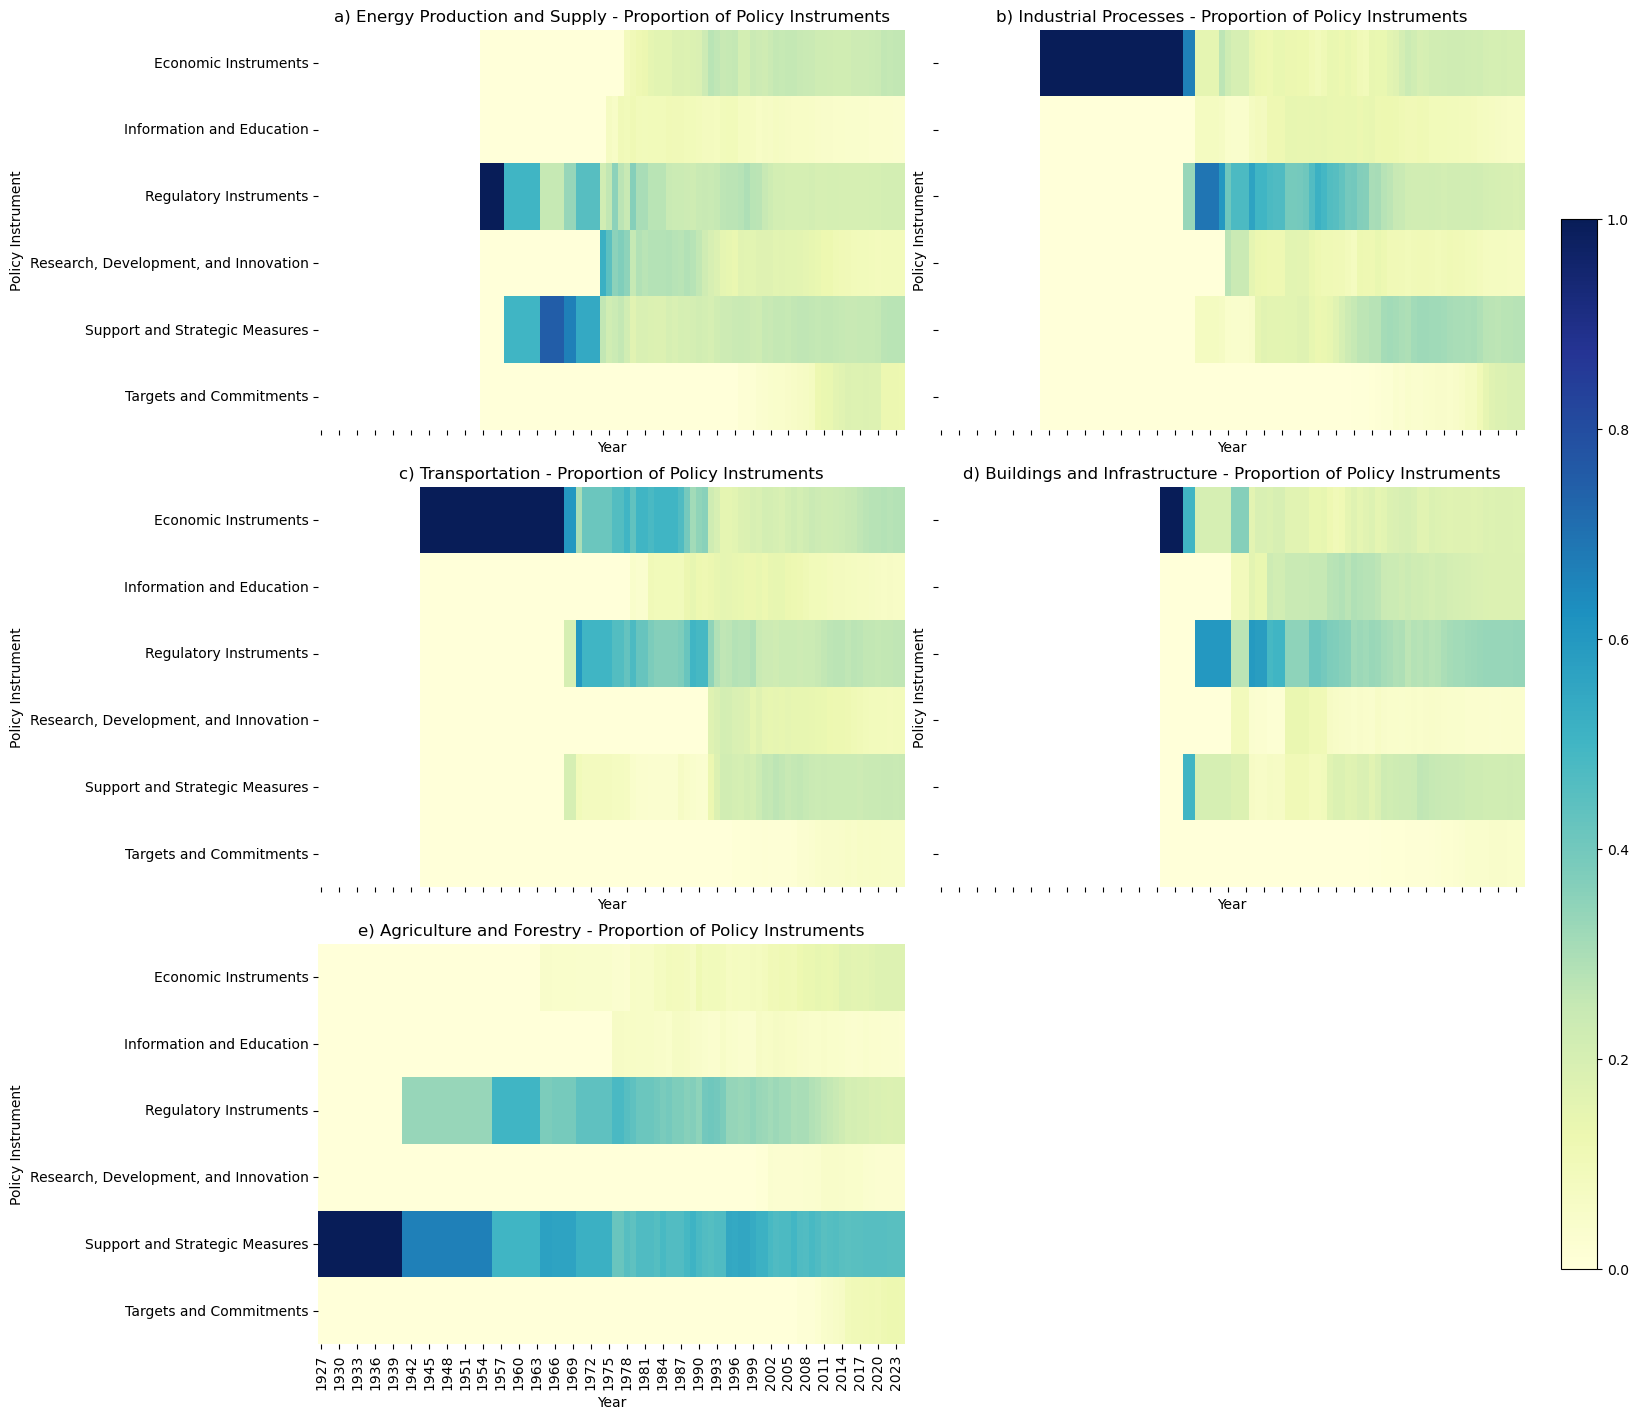

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exploding and filtering the DataFrame
s_exploded_df = exploded.explode("policy_instrument")
s_exploded_df["policy_instrument"] = s_exploded_df["policy_instrument"].str.strip()

# Exclude the 'General' sector group
sector_groups = s_exploded_df['sector_group'].unique()
sector_groups = [sg for sg in sector_groups if sg != 'General']

# Determine the full range of years across all data
all_years = pd.Index(range(s_exploded_df['active_year'].min(), s_exploded_df['active_year'].max() + 1))

# Determine the number of rows needed (3 subplots per row)
n_rows = (len(sector_groups) + 2) // 3  # Adding 2 before division to handle remainder

# Create a figure with subplots (3 subplots per row)
fig, axs = plt.subplots(3, 2, figsize=(18, 5 * n_rows), sharex=True, sharey=True)

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Plotting each sector group as a heatmap, excluding the last two graphs
for i, sector in enumerate(sector_groups[:-2]):  # Exclude the last two sectors
    sector_data = s_exploded_df[s_exploded_df['sector_group'] == sector]
    yearly_policy_counts = sector_data.groupby(['active_year', 'policy_instrument_group']).size().unstack().fillna(0)
    
    # Reindex to include all years, filling missing years with 0
    yearly_policy_counts = yearly_policy_counts.reindex(all_years, fill_value=0)
    
    # Calculate proportions over time
    proportions_over_time = yearly_policy_counts.div(yearly_policy_counts.sum(axis=1), axis=0)
    
    # Plot heatmap without text annotations and with sorted years
    sns.heatmap(proportions_over_time.T, annot=False, cmap="YlGnBu", cbar=False, ax=axs[i])
    axs[i].set_title(f'{a[i]}) {sector} - Proportion of Policy Instruments')
    axs[i].set_ylabel('Policy Instrument')
    axs[i].set_xlabel('Year')

# Hide any unused subplots if the number of sectors is not a multiple of 3
for j in range(len(sector_groups) - 2, len(axs)):  # Adjust to start hiding from the right index
    fig.delaxes(axs[j])

# Adding a color bar (cbar) for the entire figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap="YlGnBu")
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1, right=0.85)  # Adjust layout to make room for the color bar and legend
plt.show()

# Separate by Sectors

## Energy Production and Supply

In [5]:
s_exploded_df = exploded.explode("policy_instrument")
s_exploded_df = s_exploded_df.loc[s_exploded_df["sector_group"] == "Energy Production and Supply"]
s_exploded_df["policy_instrument"] = s_exploded_df["policy_instrument"].str.strip()

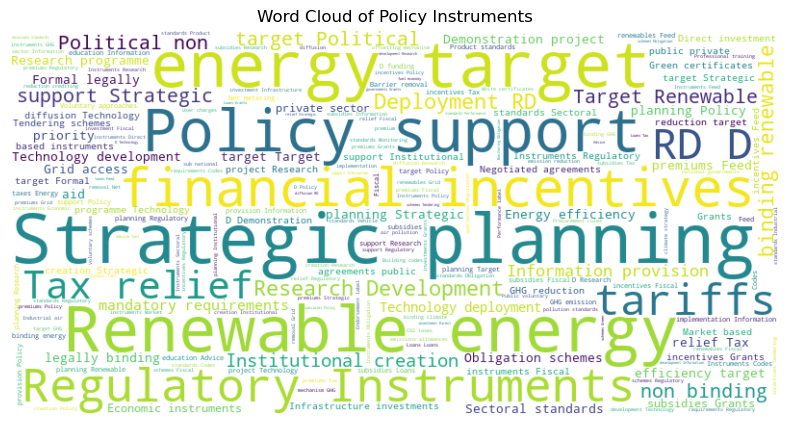

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud for Policy Instruments
policy_instruments = ' '.join(s_exploded_df['policy_instrument'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(policy_instruments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Policy Instruments')
plt.show()

<Figure size 1400x800 with 0 Axes>

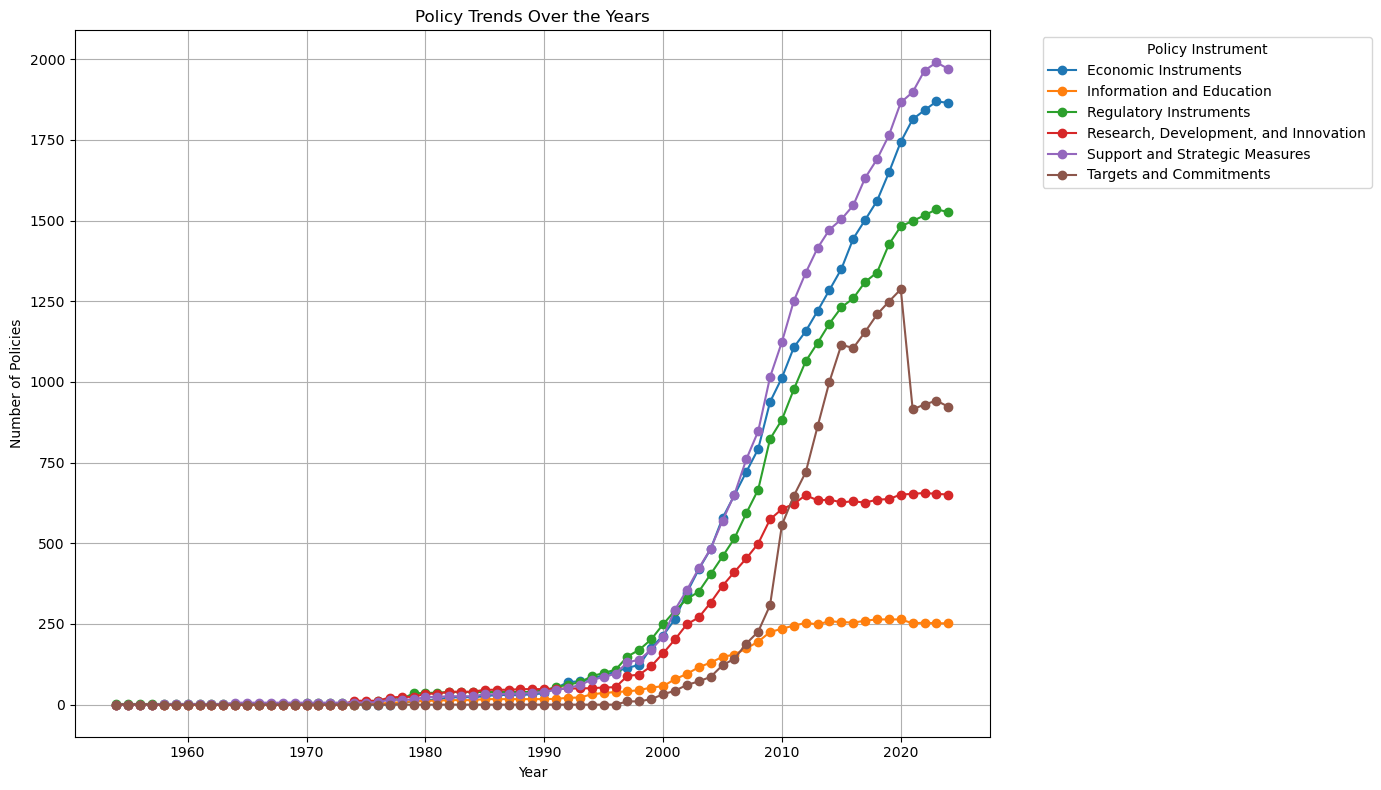

In [7]:
# Grouping data by year and policy instrument
yearly_policy_counts = s_exploded_df.groupby(['active_year', 'policy_instrument_group']).size().unstack().fillna(0)

# Plotting the trends over the years
plt.figure(figsize=(14, 8))
yearly_policy_counts.plot(kind='line', stacked=False, marker='o', figsize=(14, 8))
plt.title('Policy Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

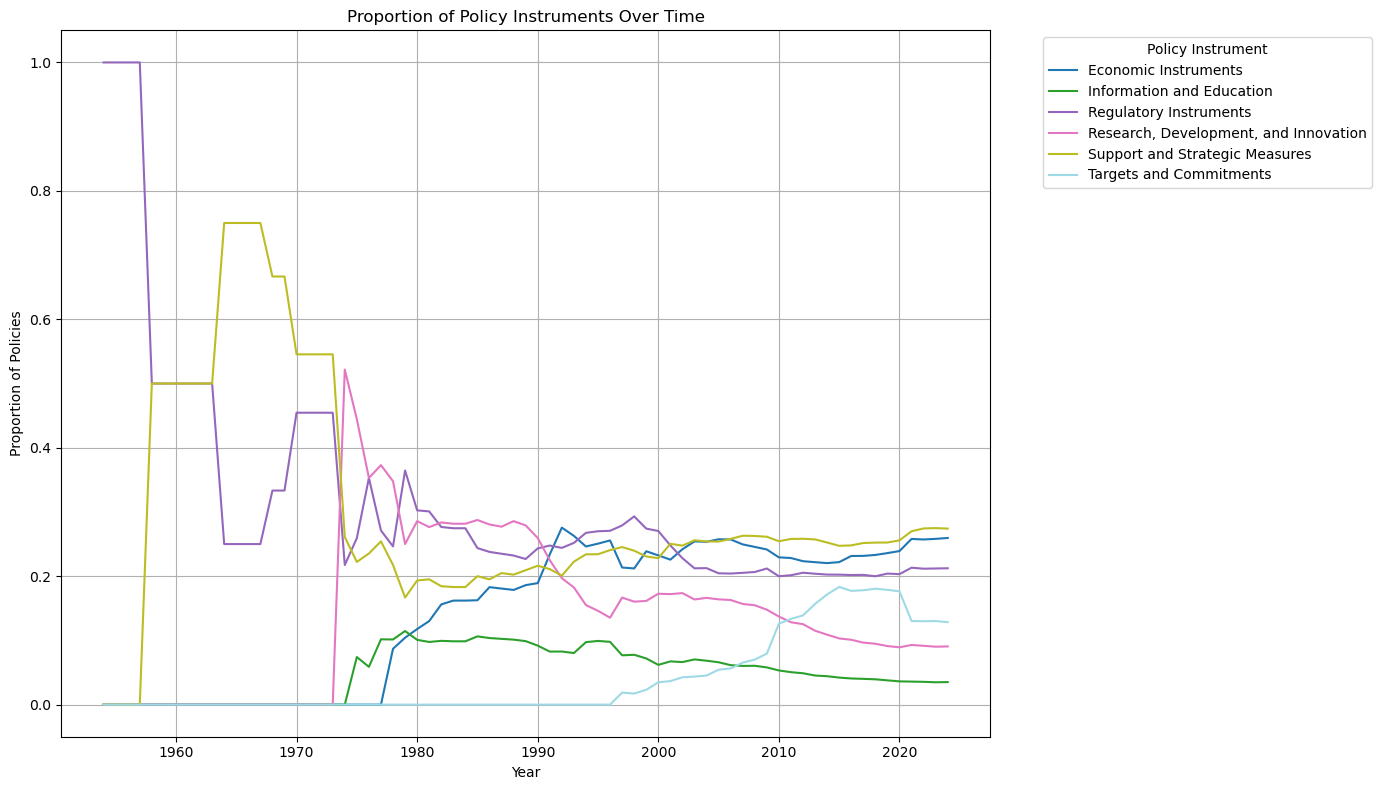

In [8]:
# Proportions Over Time
proportions_over_time = yearly_policy_counts.div(yearly_policy_counts.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
proportions_over_time.plot(kind='line', stacked=False, colormap='tab20', figsize=(14, 8))
plt.title('Proportion of Policy Instruments Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

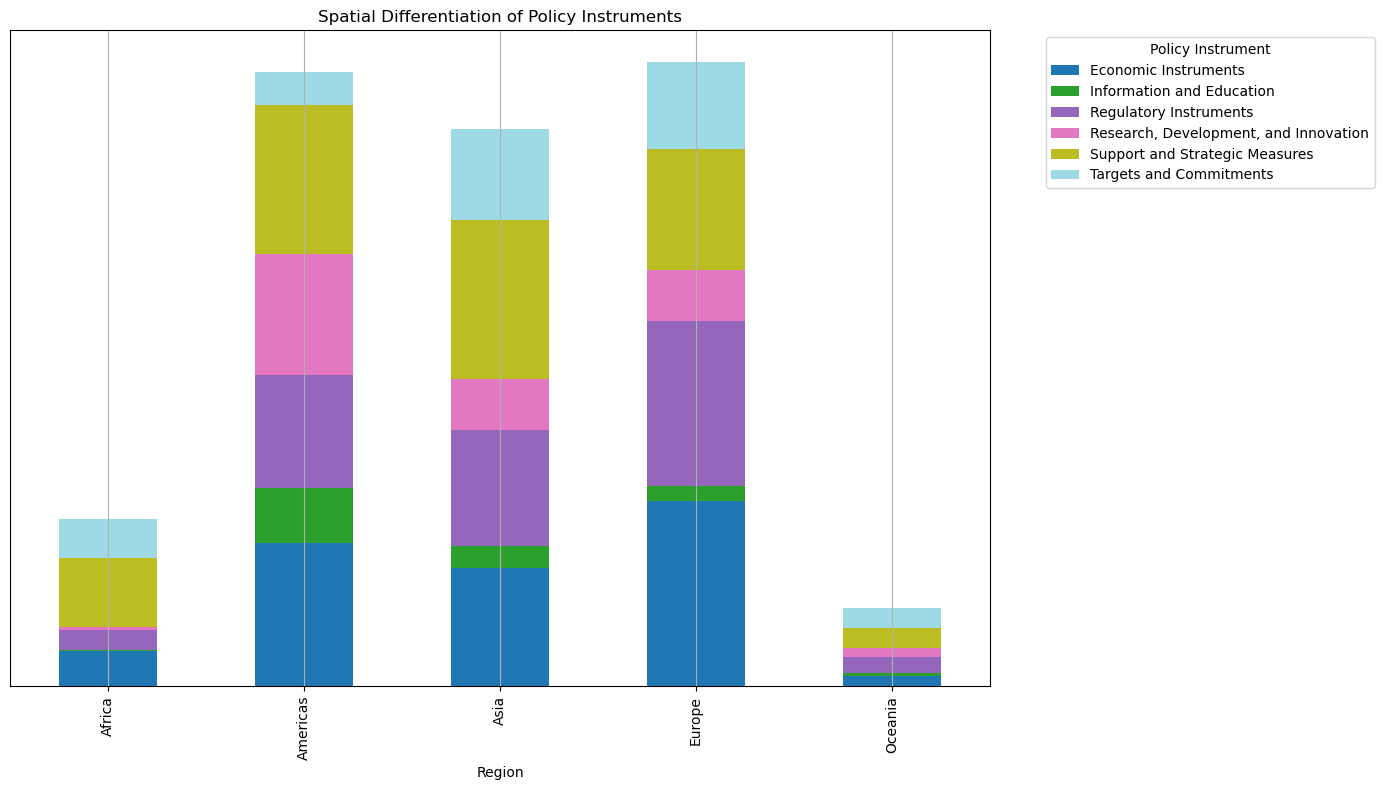

In [9]:
# Spatial Differentiation
region_policy_counts = s_exploded_df.groupby(['region', 'policy_instrument_group']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
region_policy_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Spatial Differentiation of Policy Instruments')
plt.xlabel('Region')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis
plt.tight_layout()
plt.show()

## Transportation 

In [10]:
s_exploded_df = exploded.explode("policy_instrument")
s_exploded_df = s_exploded_df.loc[s_exploded_df["sector_group"] == "Transportation"]
s_exploded_df["policy_instrument"] = s_exploded_df["policy_instrument"].str.strip()

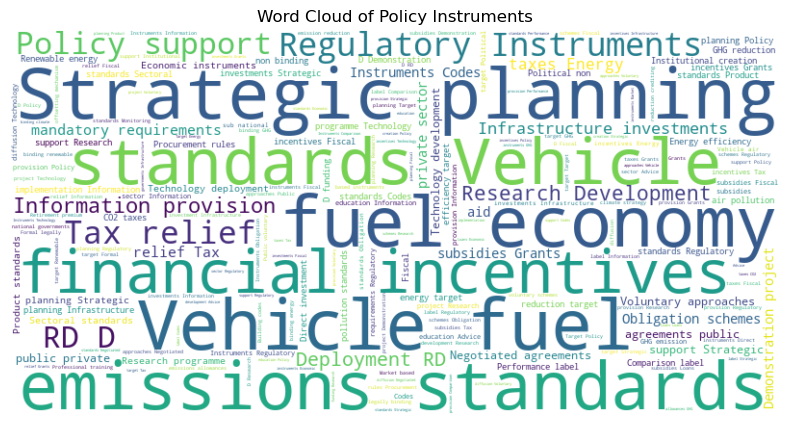

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud for Policy Instruments
policy_instruments = ' '.join(s_exploded_df['policy_instrument'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(policy_instruments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Policy Instruments')
plt.show()

<Figure size 1400x800 with 0 Axes>

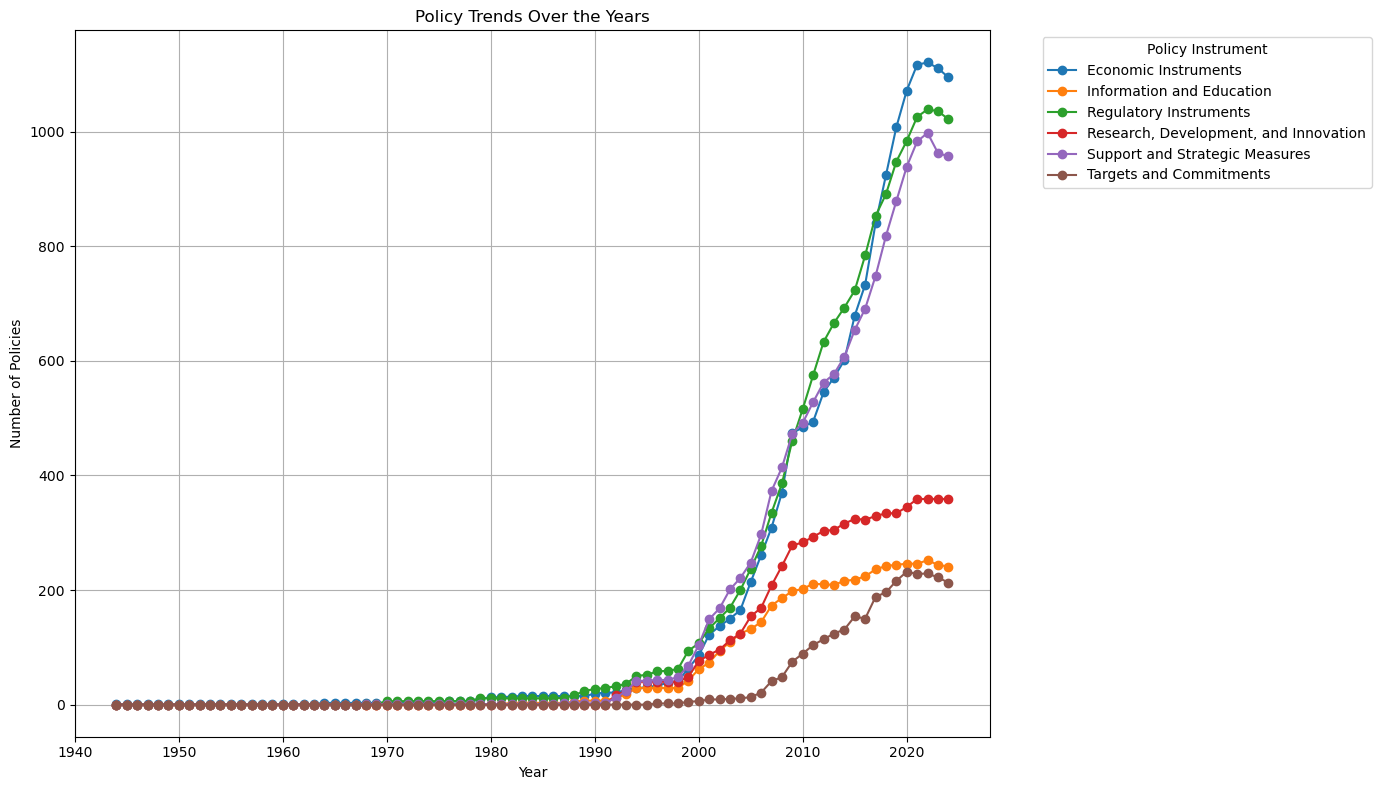

In [12]:
# Grouping data by year and policy instrument
yearly_policy_counts = s_exploded_df.groupby(['active_year', 'policy_instrument_group']).size().unstack().fillna(0)

# Plotting the trends over the years
plt.figure(figsize=(14, 8))
yearly_policy_counts.plot(kind='line', stacked=False, marker='o', figsize=(14, 8))
plt.title('Policy Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

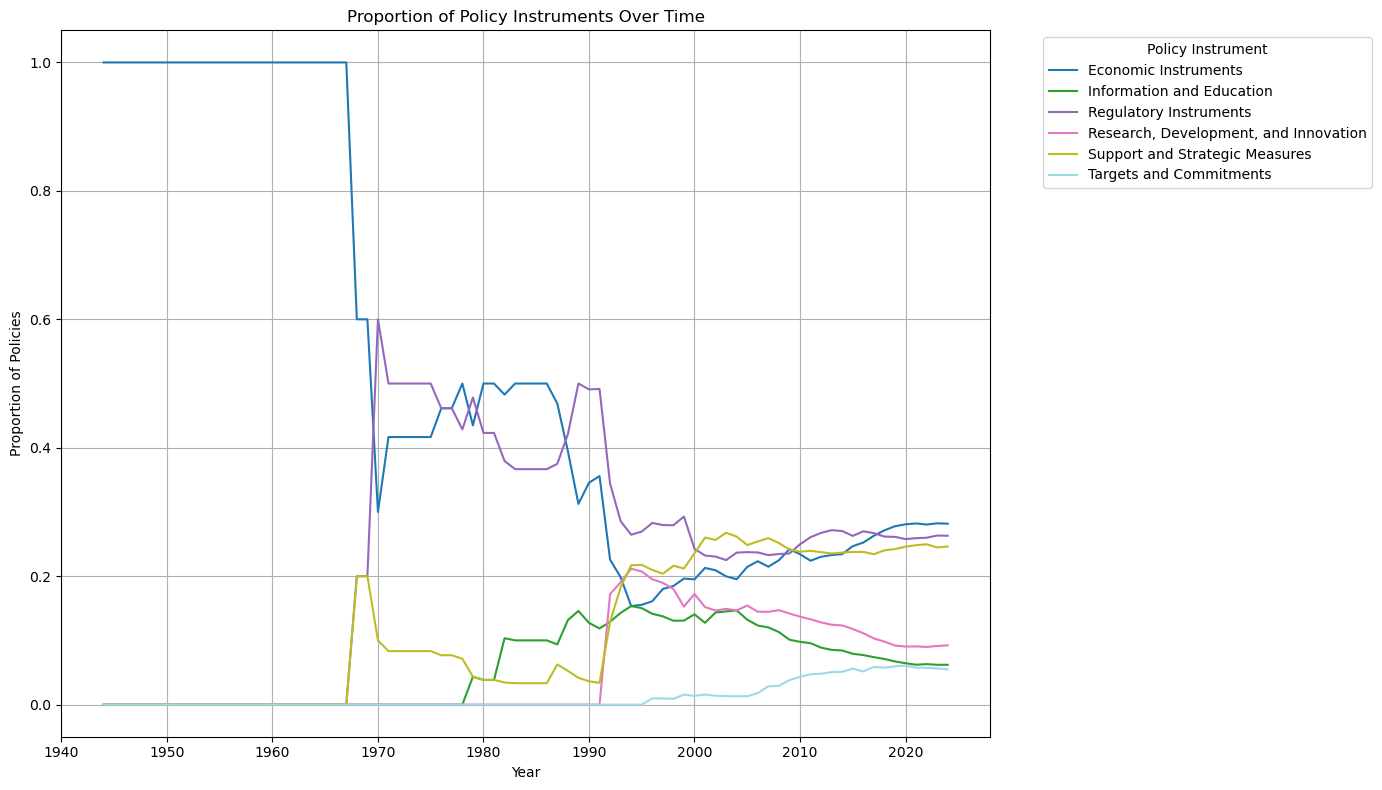

In [13]:
# Proportions Over Time
proportions_over_time = yearly_policy_counts.div(yearly_policy_counts.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
proportions_over_time.plot(kind='line', stacked=False, colormap='tab20', figsize=(14, 8))
plt.title('Proportion of Policy Instruments Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

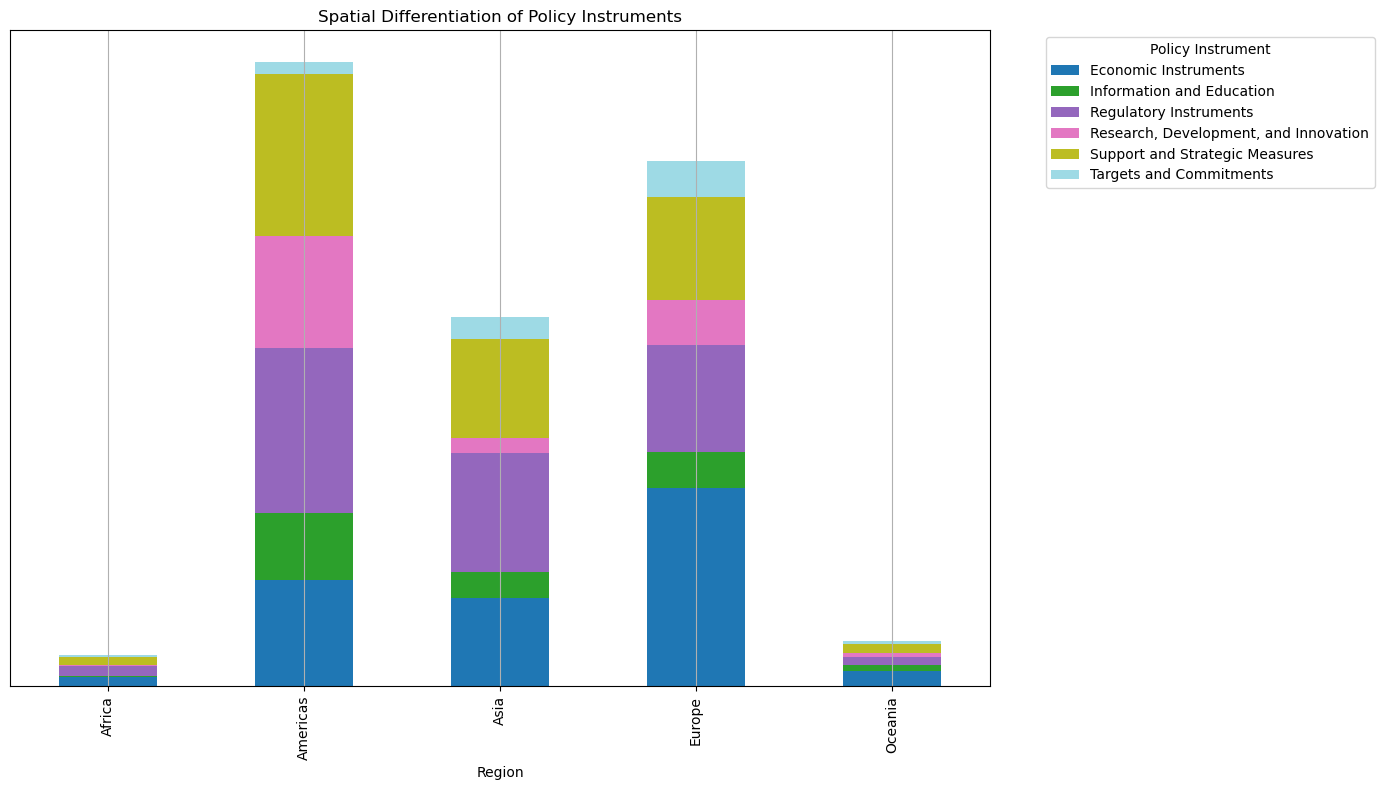

In [14]:
# Spatial Differentiation
region_policy_counts = s_exploded_df.groupby(['region', 'policy_instrument_group']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
region_policy_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Spatial Differentiation of Policy Instruments')
plt.xlabel('Region')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis
plt.tight_layout()
plt.show()

## Buildings and Infrastructure

In [15]:
s_exploded_df = exploded.explode("policy_instrument")
s_exploded_df = s_exploded_df.loc[s_exploded_df["sector_group"] == "Buildings and Infrastructure"]
s_exploded_df["policy_instrument"] = s_exploded_df["policy_instrument"].str.strip()

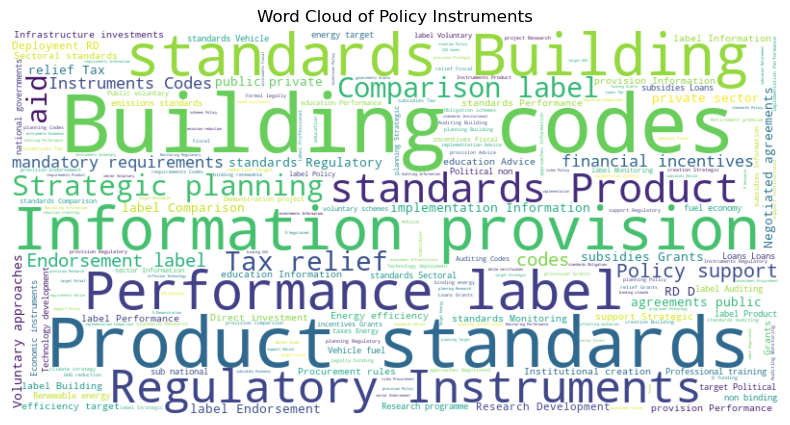

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud for Policy Instruments
policy_instruments = ' '.join(s_exploded_df['policy_instrument'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(policy_instruments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Policy Instruments')
plt.show()

<Figure size 1400x800 with 0 Axes>

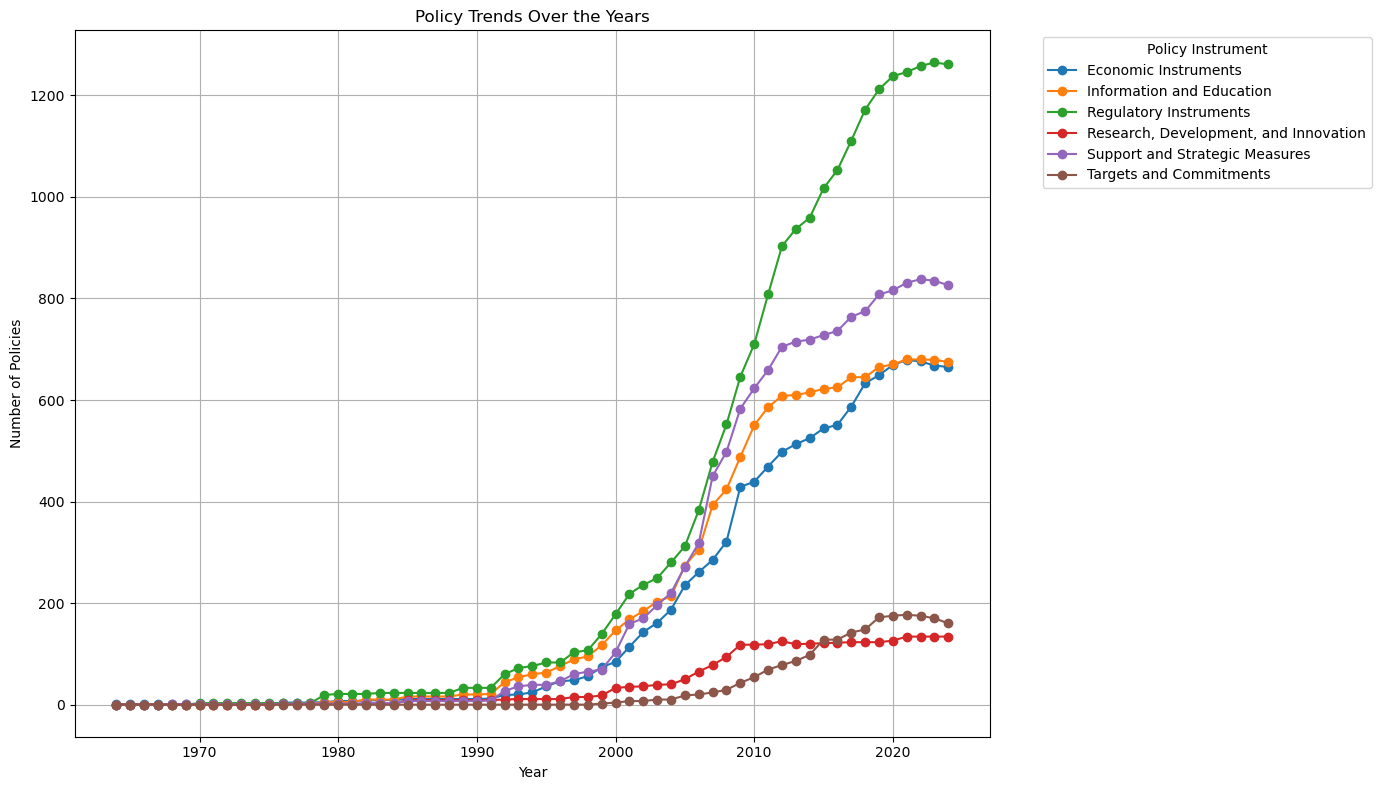

In [17]:
# Grouping data by year and policy instrument
yearly_policy_counts = s_exploded_df.groupby(['active_year', 'policy_instrument_group']).size().unstack().fillna(0)

# Plotting the trends over the years
plt.figure(figsize=(14, 8))
yearly_policy_counts.plot(kind='line', stacked=False, marker='o', figsize=(14, 8))
plt.title('Policy Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

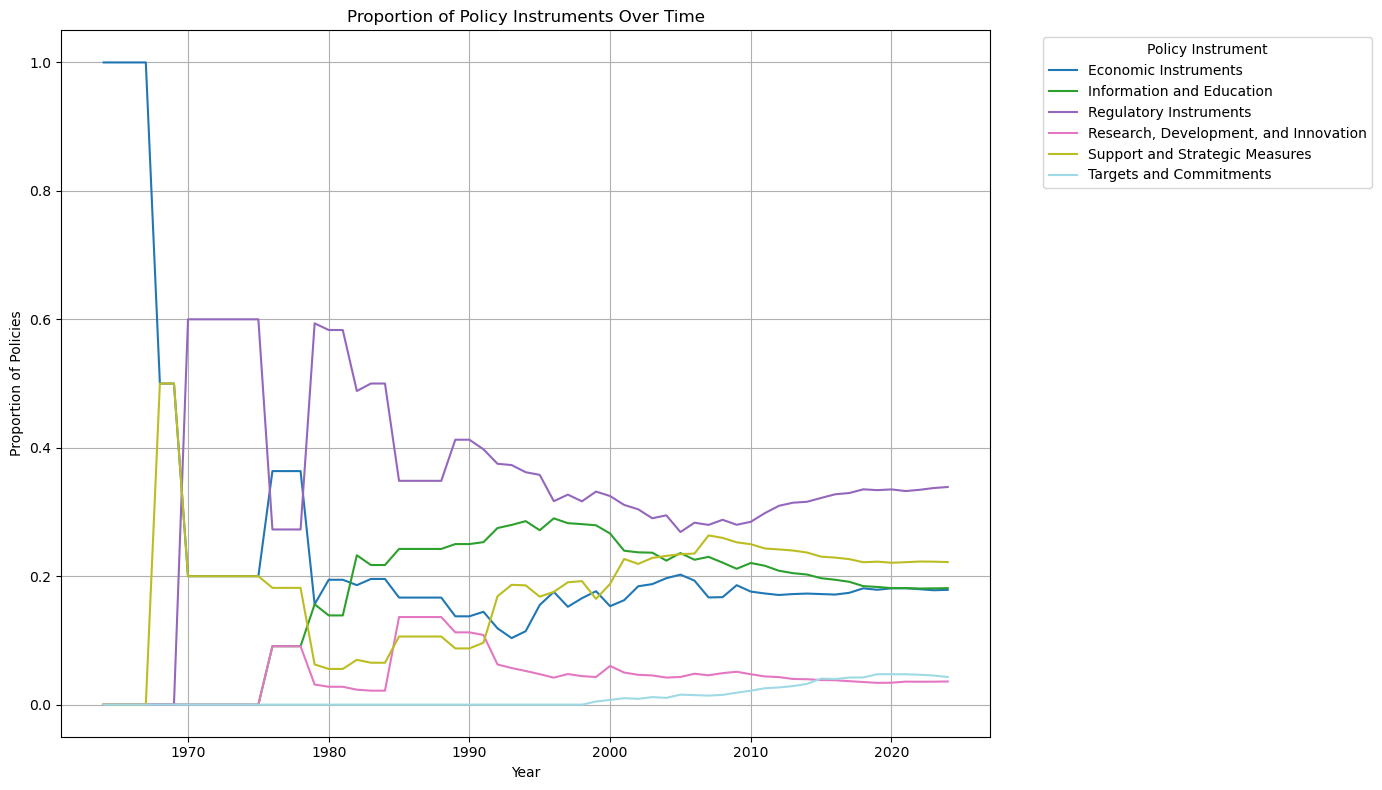

In [18]:
# Proportions Over Time
proportions_over_time = yearly_policy_counts.div(yearly_policy_counts.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
proportions_over_time.plot(kind='line', stacked=False, colormap='tab20', figsize=(14, 8))
plt.title('Proportion of Policy Instruments Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

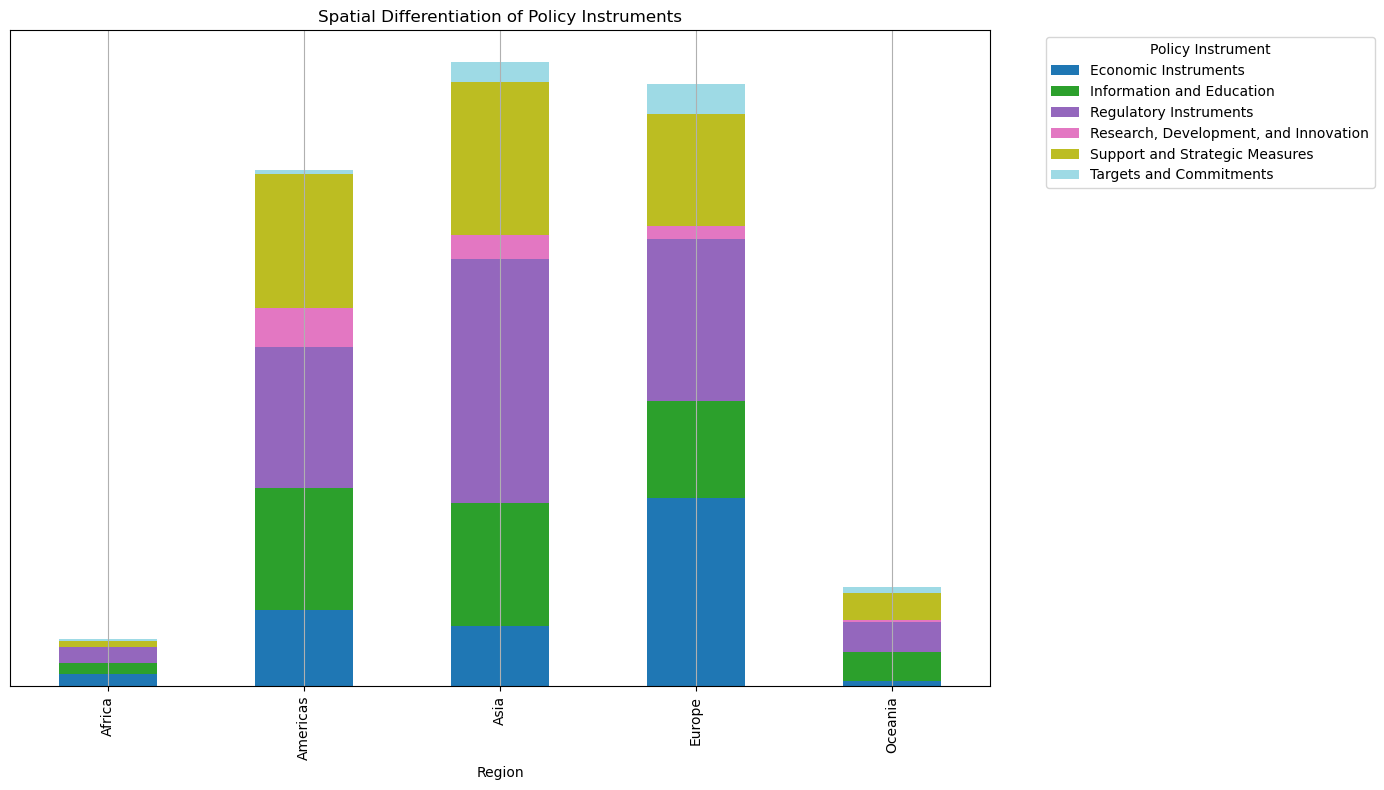

In [19]:
# Spatial Differentiation
region_policy_counts = s_exploded_df.groupby(['region', 'policy_instrument_group']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
region_policy_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Spatial Differentiation of Policy Instruments')
plt.xlabel('Region')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis
plt.tight_layout()
plt.show()

## Industrial Processes

In [20]:
s_exploded_df = exploded.explode("policy_instrument")
s_exploded_df = s_exploded_df.loc[s_exploded_df["sector_group"] == "Industrial Processes"]
s_exploded_df["policy_instrument"] = s_exploded_df["policy_instrument"].str.strip()

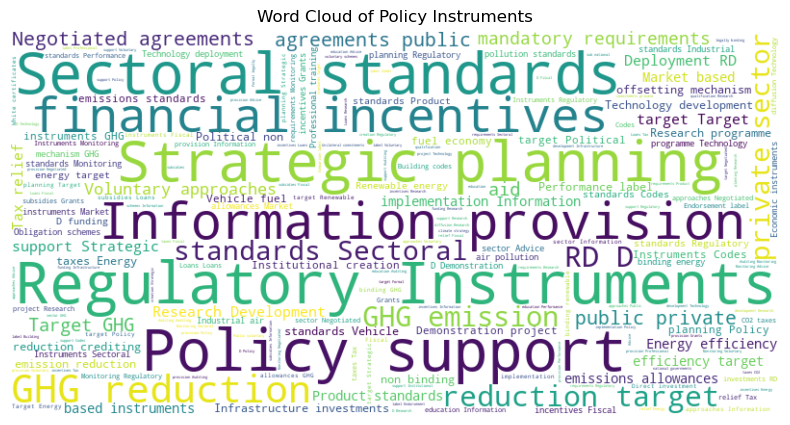

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud for Policy Instruments
policy_instruments = ' '.join(s_exploded_df['policy_instrument'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(policy_instruments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Policy Instruments')
plt.show()

<Figure size 1400x800 with 0 Axes>

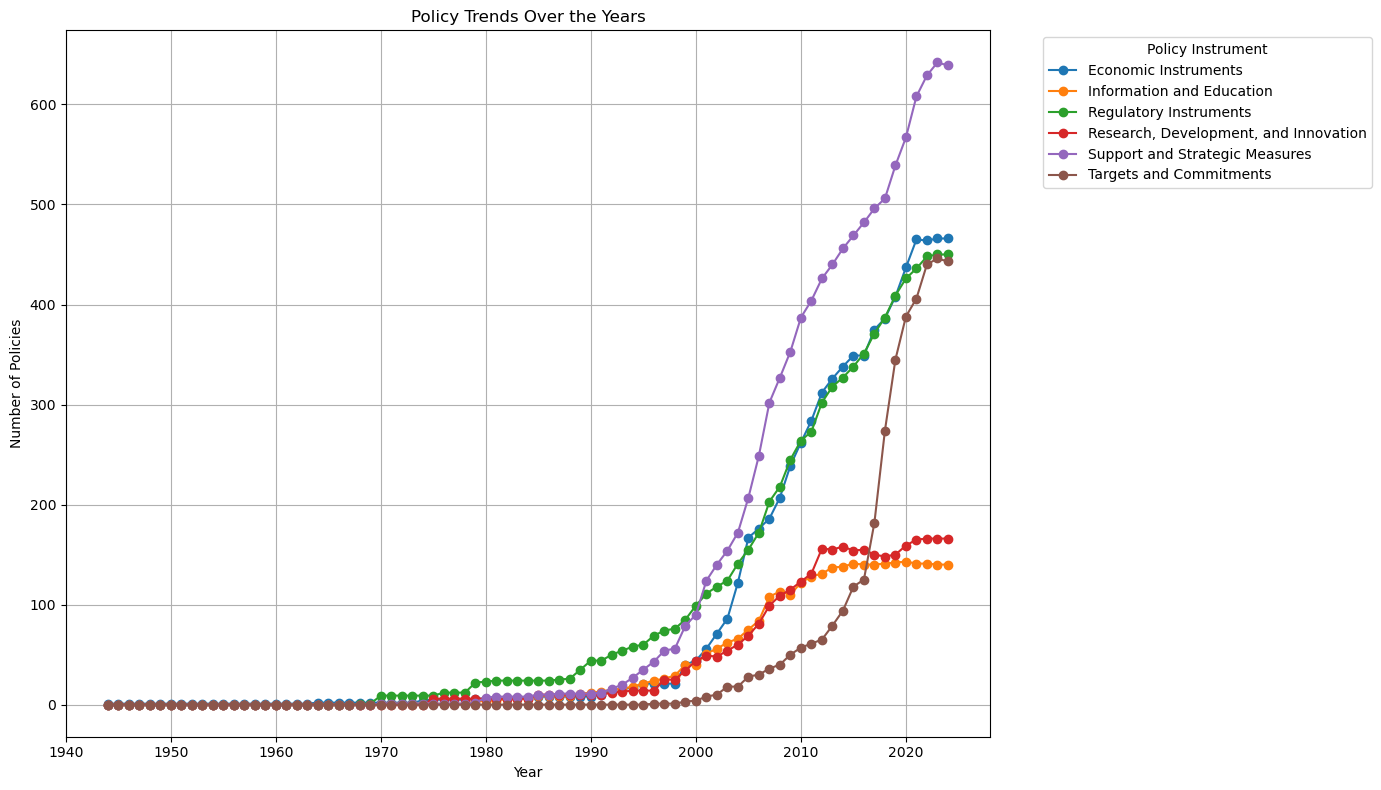

In [22]:
# Grouping data by year and policy instrument
yearly_policy_counts = s_exploded_df.groupby(['active_year', 'policy_instrument_group']).size().unstack().fillna(0)

# Plotting the trends over the years
plt.figure(figsize=(14, 8))
yearly_policy_counts.plot(kind='line', stacked=False, marker='o', figsize=(14, 8))
plt.title('Policy Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

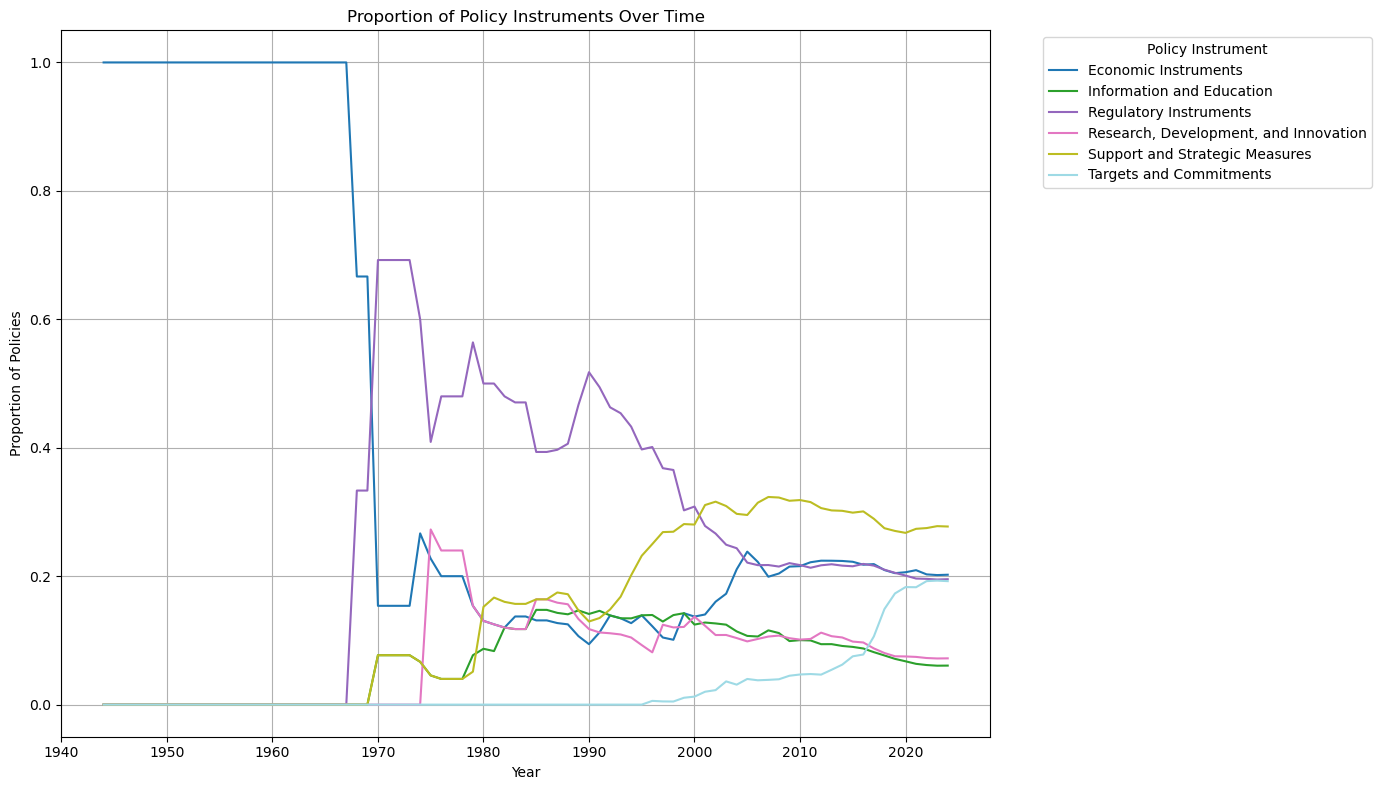

In [23]:
# Proportions Over Time
proportions_over_time = yearly_policy_counts.div(yearly_policy_counts.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
proportions_over_time.plot(kind='line', stacked=False, colormap='tab20', figsize=(14, 8))
plt.title('Proportion of Policy Instruments Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

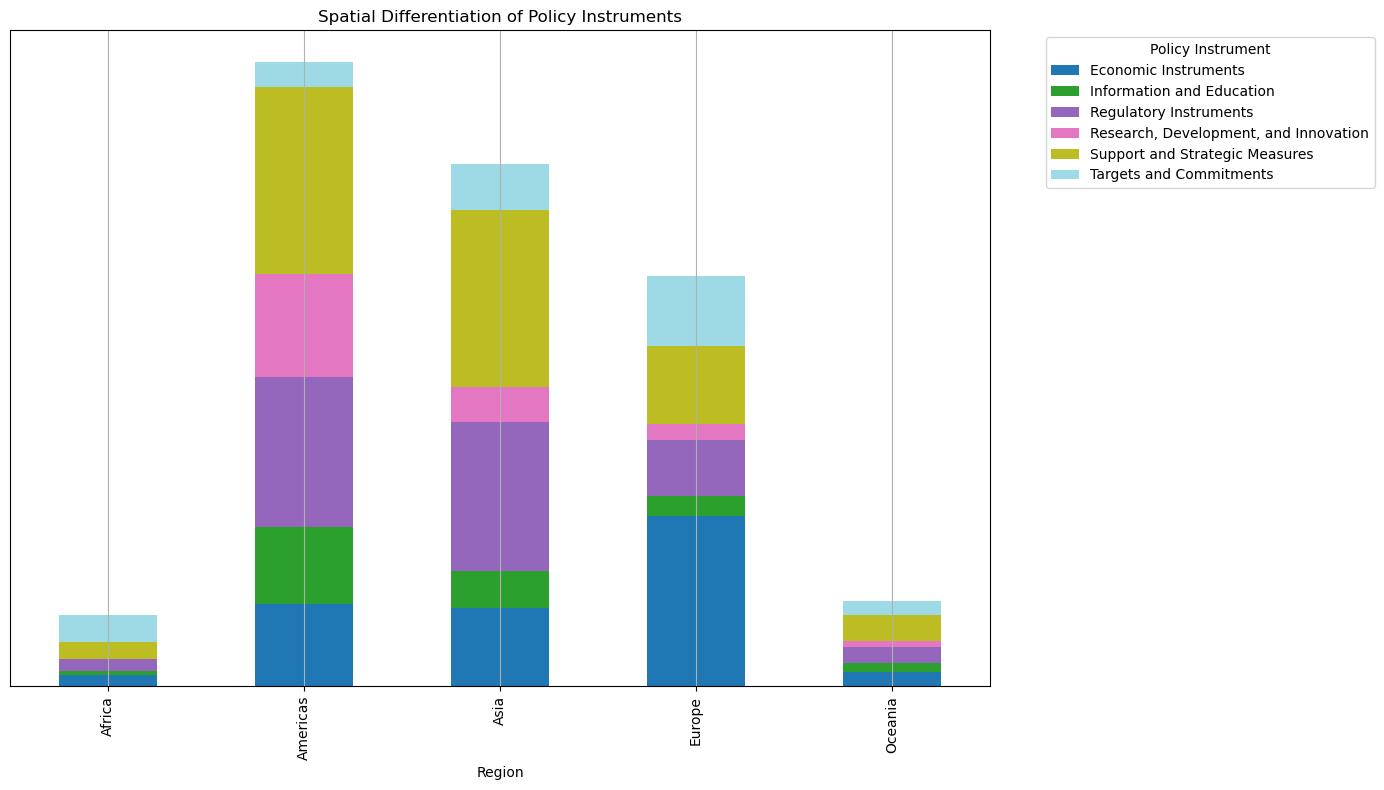

In [24]:
# Spatial Differentiation
region_policy_counts = s_exploded_df.groupby(['region', 'policy_instrument_group']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
region_policy_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Spatial Differentiation of Policy Instruments')
plt.xlabel('Region')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis
plt.tight_layout()
plt.show()

## Agriculture and Forestry

In [25]:
s_exploded_df = exploded.explode("policy_instrument")
s_exploded_df = s_exploded_df.loc[s_exploded_df["sector_group"] == "Agriculture and Forestry"]
s_exploded_df["policy_instrument"] = s_exploded_df["policy_instrument"].str.strip()

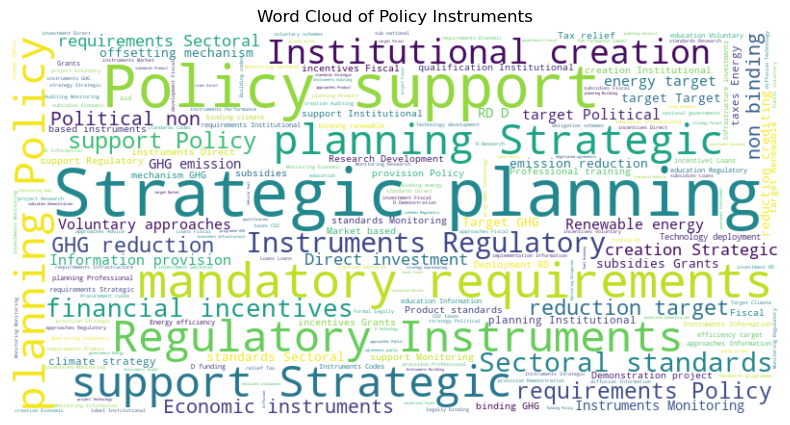

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud for Policy Instruments
policy_instruments = ' '.join(s_exploded_df['policy_instrument'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(policy_instruments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Policy Instruments')
plt.show()

<Figure size 1400x800 with 0 Axes>

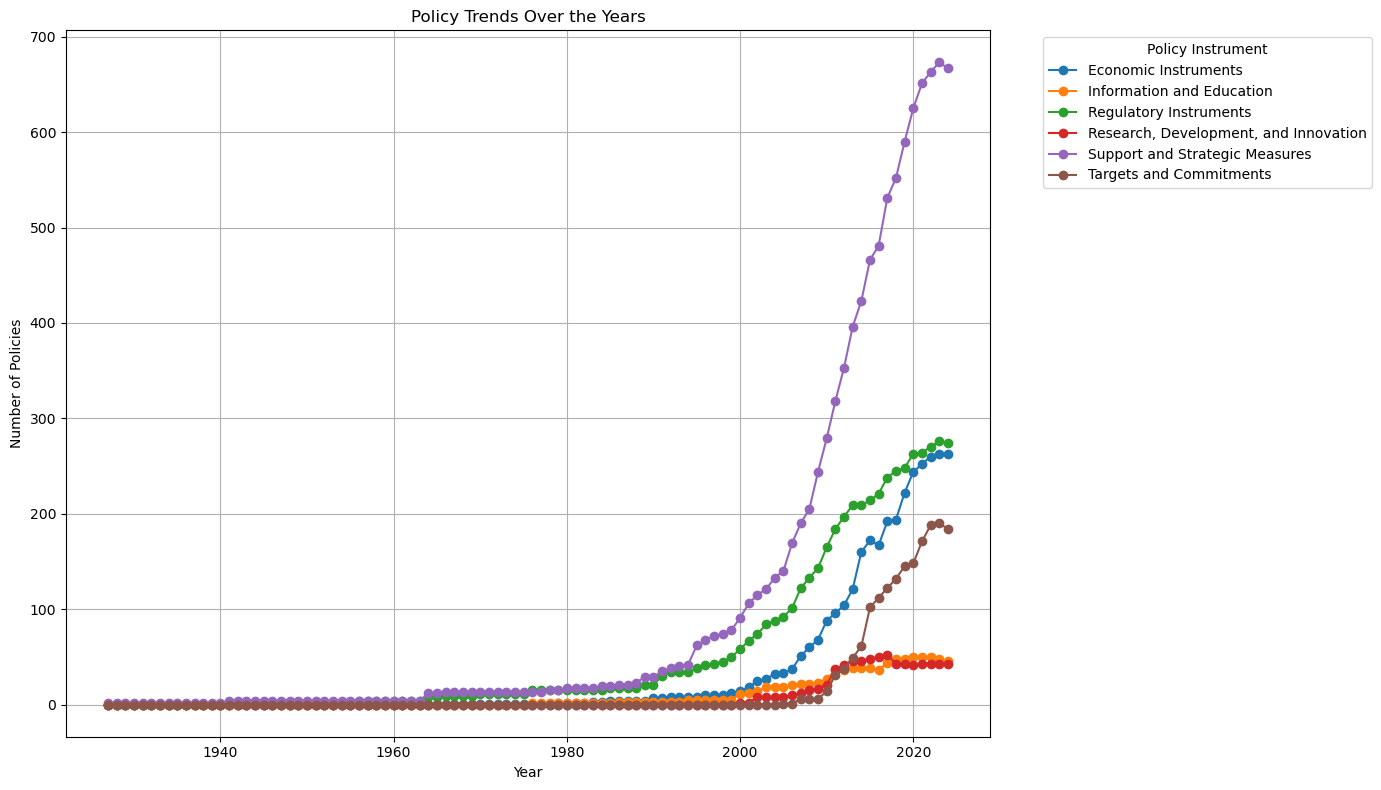

In [27]:
# Grouping data by year and policy instrument
yearly_policy_counts = s_exploded_df.groupby(['active_year', 'policy_instrument_group']).size().unstack().fillna(0)

# Plotting the trends over the years
plt.figure(figsize=(14, 8))
yearly_policy_counts.plot(kind='line', stacked=False, marker='o', figsize=(14, 8))
plt.title('Policy Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

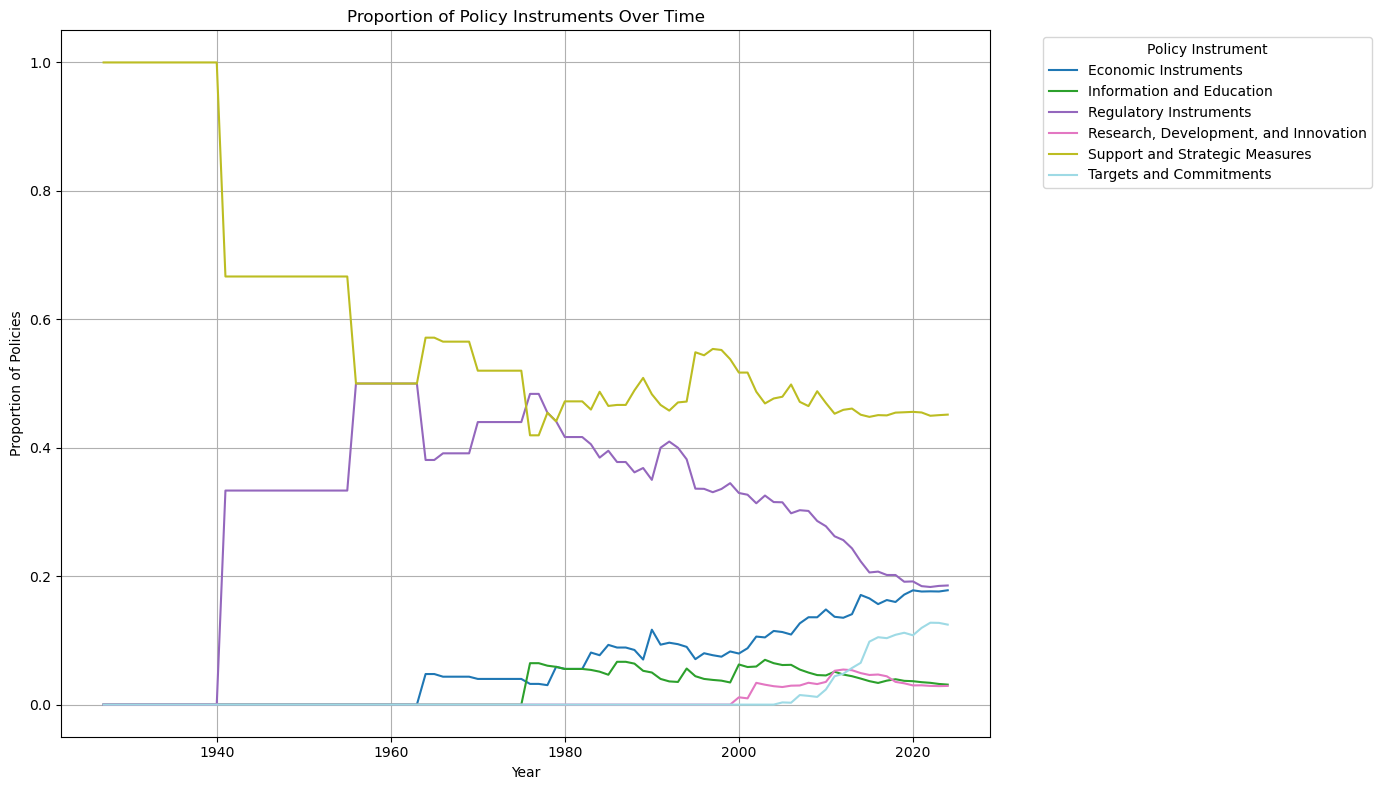

In [28]:
# Proportions Over Time
proportions_over_time = yearly_policy_counts.div(yearly_policy_counts.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
proportions_over_time.plot(kind='line', stacked=False, colormap='tab20', figsize=(14, 8))
plt.title('Proportion of Policy Instruments Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

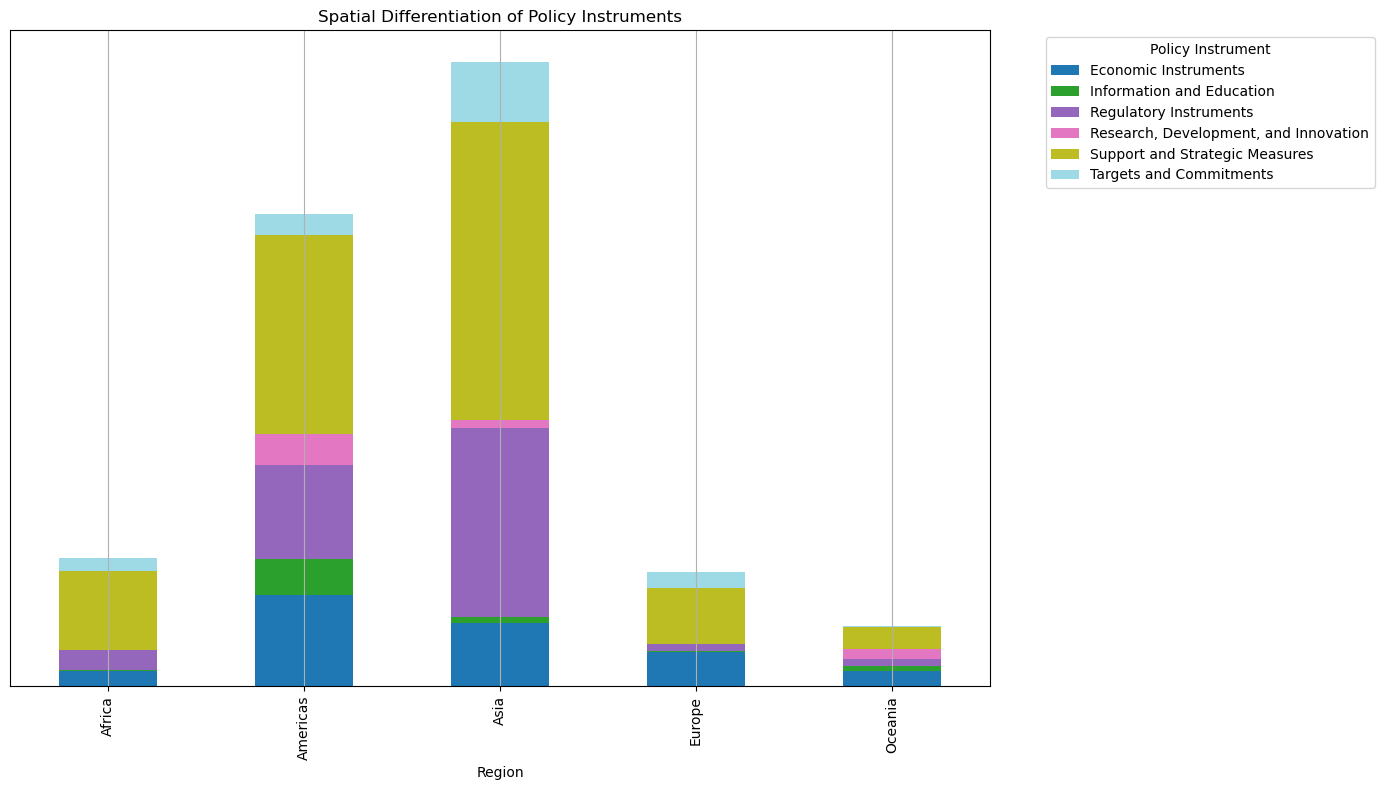

In [29]:
# Spatial Differentiation
region_policy_counts = s_exploded_df.groupby(['region', 'policy_instrument_group']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
region_policy_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Spatial Differentiation of Policy Instruments')
plt.xlabel('Region')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis
plt.tight_layout()
plt.show()

## Waste Management

In [30]:
s_exploded_df = exploded.explode("policy_instrument")
s_exploded_df = s_exploded_df.loc[s_exploded_df["sector_group"] == "Waste Management"]
s_exploded_df["policy_instrument"] = s_exploded_df["policy_instrument"].str.strip()

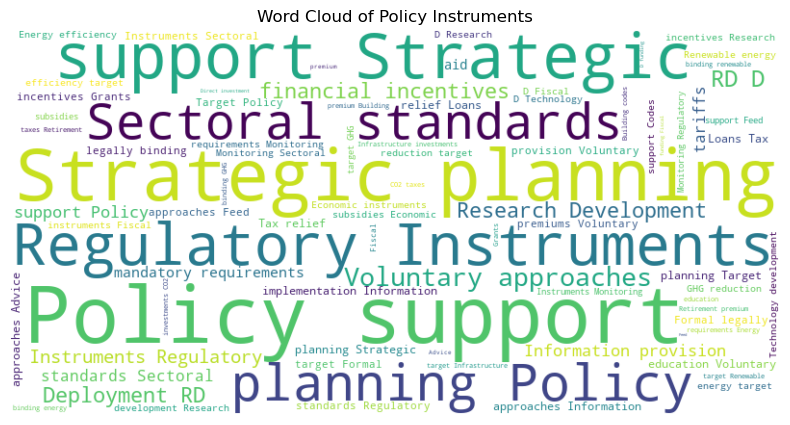

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud for Policy Instruments
policy_instruments = ' '.join(s_exploded_df['policy_instrument'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(policy_instruments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Policy Instruments')
plt.show()

<Figure size 1400x800 with 0 Axes>

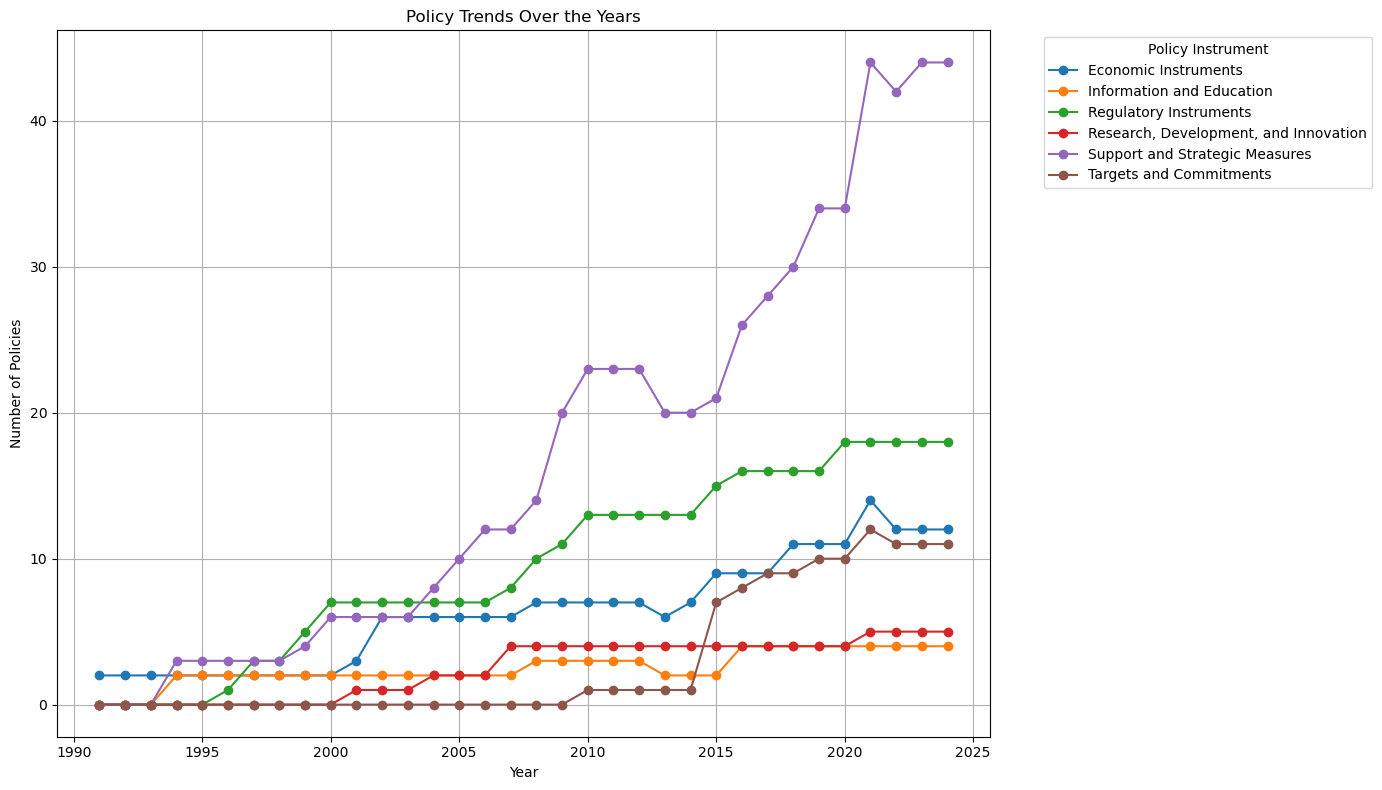

In [32]:
# Grouping data by year and policy instrument
yearly_policy_counts = s_exploded_df.groupby(['active_year', 'policy_instrument_group']).size().unstack().fillna(0)

# Plotting the trends over the years
plt.figure(figsize=(14, 8))
yearly_policy_counts.plot(kind='line', stacked=False, marker='o', figsize=(14, 8))
plt.title('Policy Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

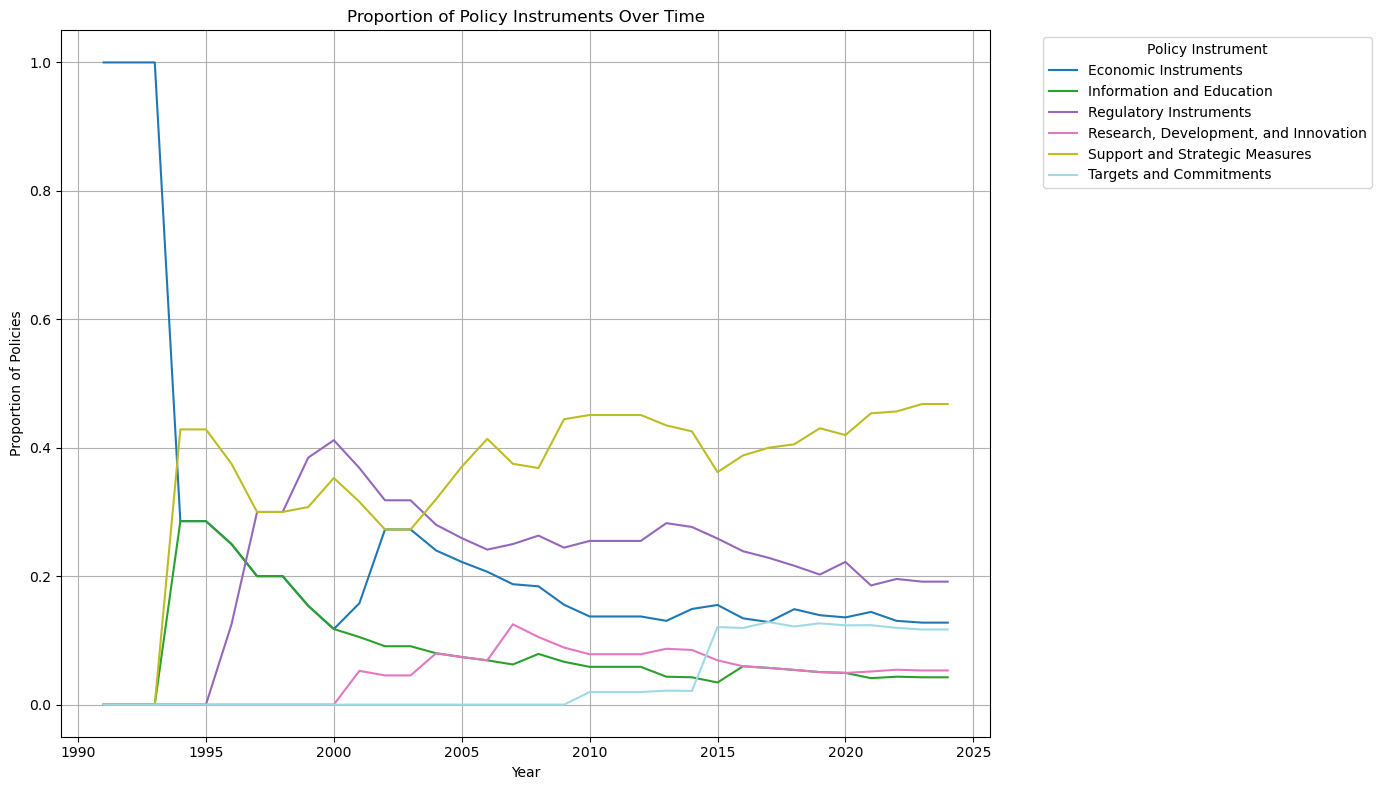

In [33]:
# Proportions Over Time
proportions_over_time = yearly_policy_counts.div(yearly_policy_counts.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
proportions_over_time.plot(kind='line', stacked=False, colormap='tab20', figsize=(14, 8))
plt.title('Proportion of Policy Instruments Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

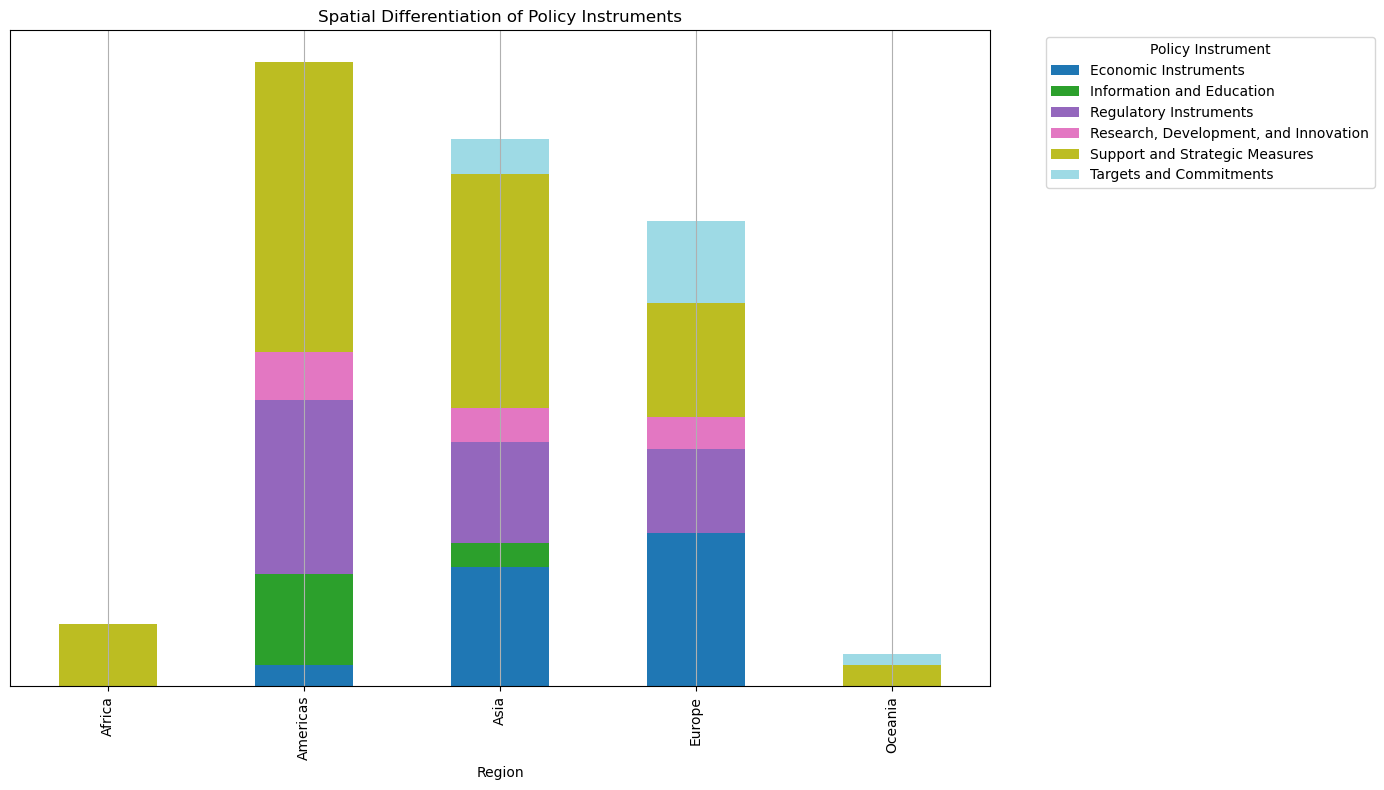

In [34]:
# Spatial Differentiation
region_policy_counts = s_exploded_df.groupby(['region', 'policy_instrument_group']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
region_policy_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Spatial Differentiation of Policy Instruments')
plt.xlabel('Region')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis
plt.tight_layout()
plt.show()

## Emission Reduction Technologies

In [35]:
s_exploded_df = exploded.explode("policy_instrument")
s_exploded_df = s_exploded_df.loc[s_exploded_df["sector_group"] == "Emission Reduction Technologies"]
s_exploded_df["policy_instrument"] = s_exploded_df["policy_instrument"].str.strip()

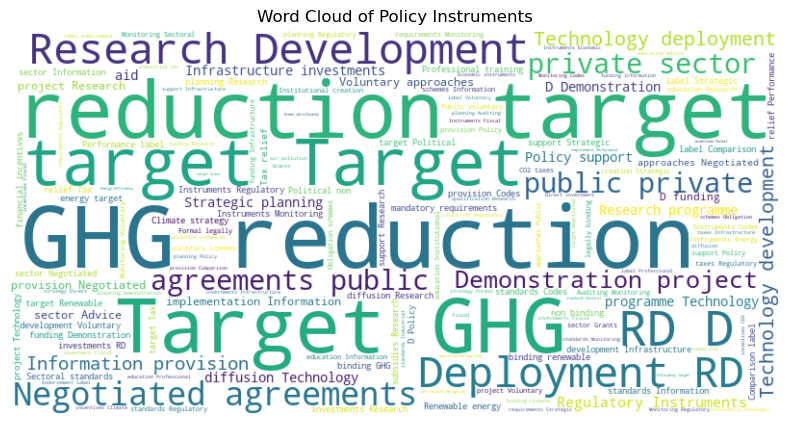

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud for Policy Instruments
policy_instruments = ' '.join(s_exploded_df['policy_instrument'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(policy_instruments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Policy Instruments')
plt.show()

<Figure size 1400x800 with 0 Axes>

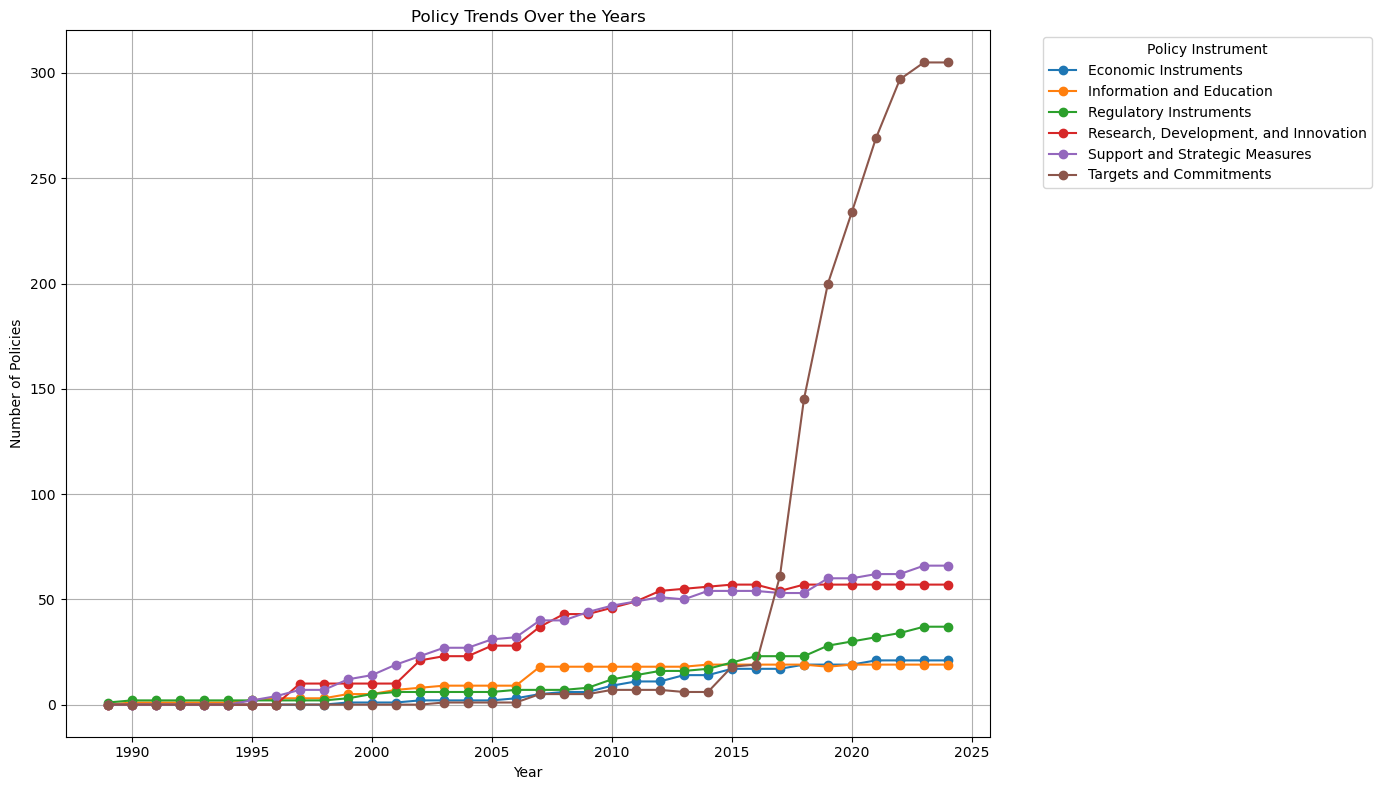

In [37]:
# Grouping data by year and policy instrument
yearly_policy_counts = s_exploded_df.groupby(['active_year', 'policy_instrument_group']).size().unstack().fillna(0)

# Plotting the trends over the years
plt.figure(figsize=(14, 8))
yearly_policy_counts.plot(kind='line', stacked=False, marker='o', figsize=(14, 8))
plt.title('Policy Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

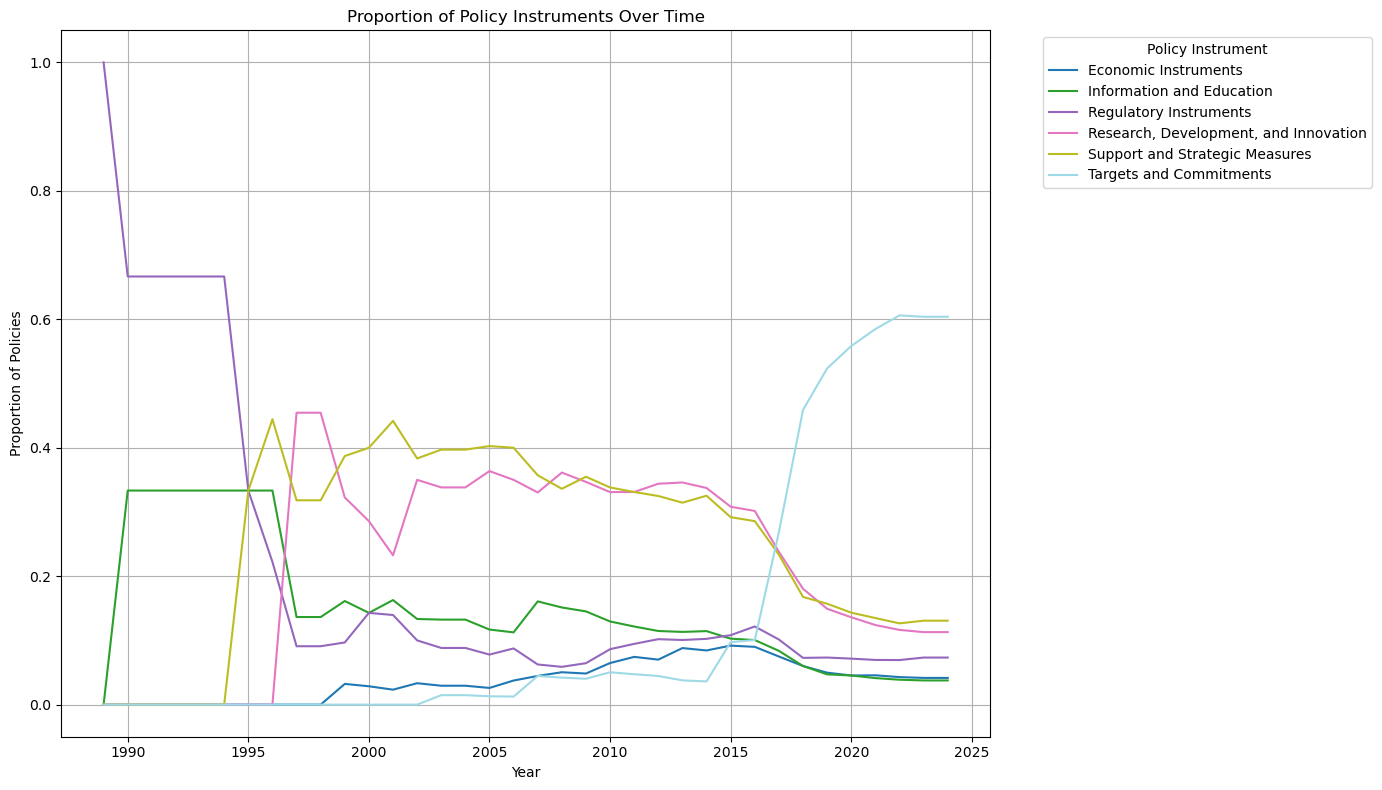

In [38]:
# Proportions Over Time
proportions_over_time = yearly_policy_counts.div(yearly_policy_counts.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
proportions_over_time.plot(kind='line', stacked=False, colormap='tab20', figsize=(14, 8))
plt.title('Proportion of Policy Instruments Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

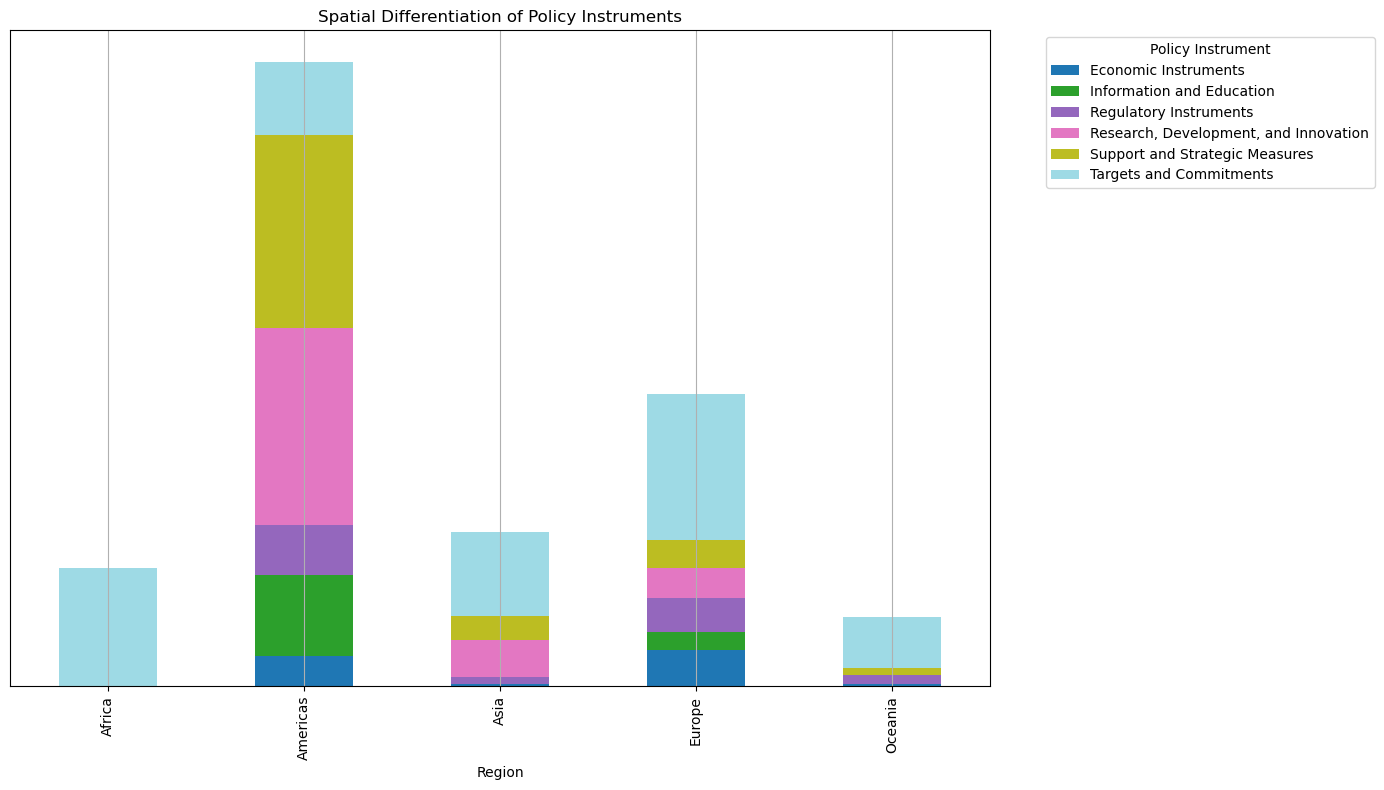

In [39]:
# Spatial Differentiation
region_policy_counts = s_exploded_df.groupby(['region', 'policy_instrument_group']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
region_policy_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Spatial Differentiation of Policy Instruments')
plt.xlabel('Region')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis
plt.tight_layout()
plt.show()

## General

In [40]:
s_exploded_df = exploded.explode("policy_instrument")
s_exploded_df = s_exploded_df.loc[s_exploded_df["sector_group"] == "General"]
s_exploded_df["policy_instrument"] = s_exploded_df["policy_instrument"].str.strip()

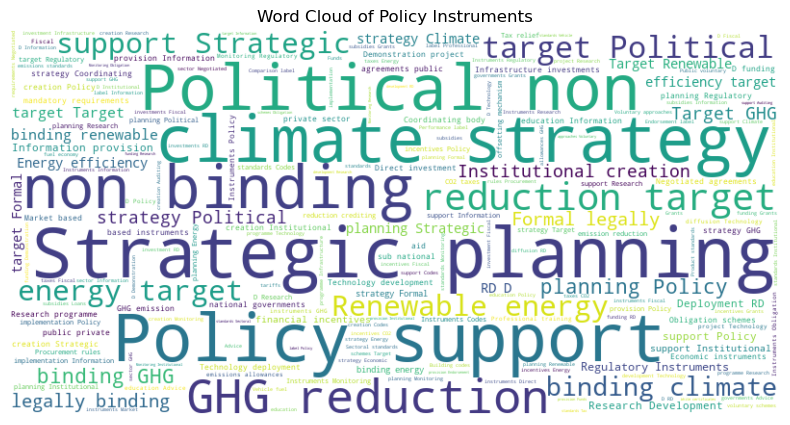

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud for Policy Instruments
policy_instruments = ' '.join(s_exploded_df['policy_instrument'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(policy_instruments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Policy Instruments')
plt.show()

<Figure size 1400x800 with 0 Axes>

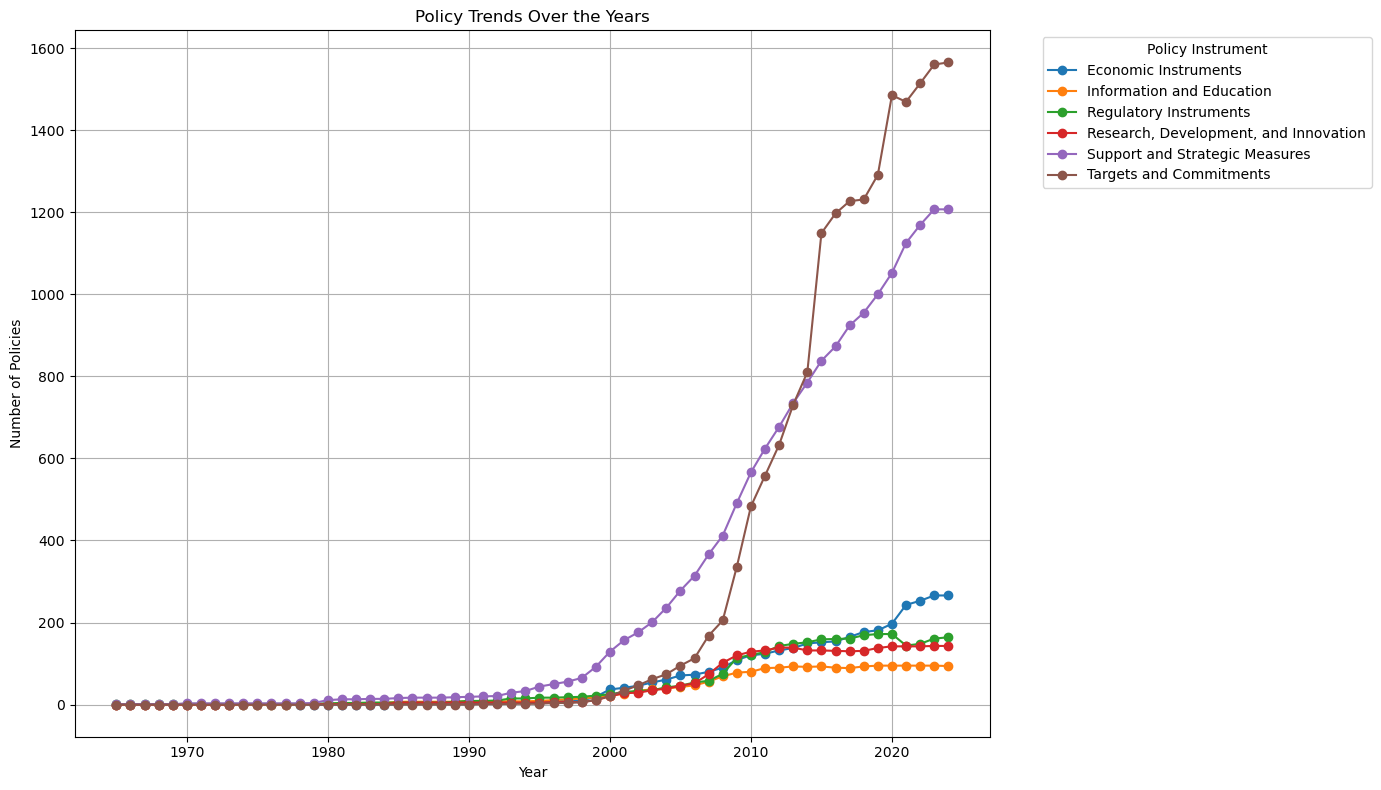

In [42]:
# Grouping data by year and policy instrument
yearly_policy_counts = s_exploded_df.groupby(['active_year', 'policy_instrument_group']).size().unstack().fillna(0)

# Plotting the trends over the years
plt.figure(figsize=(14, 8))
yearly_policy_counts.plot(kind='line', stacked=False, marker='o', figsize=(14, 8))
plt.title('Policy Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

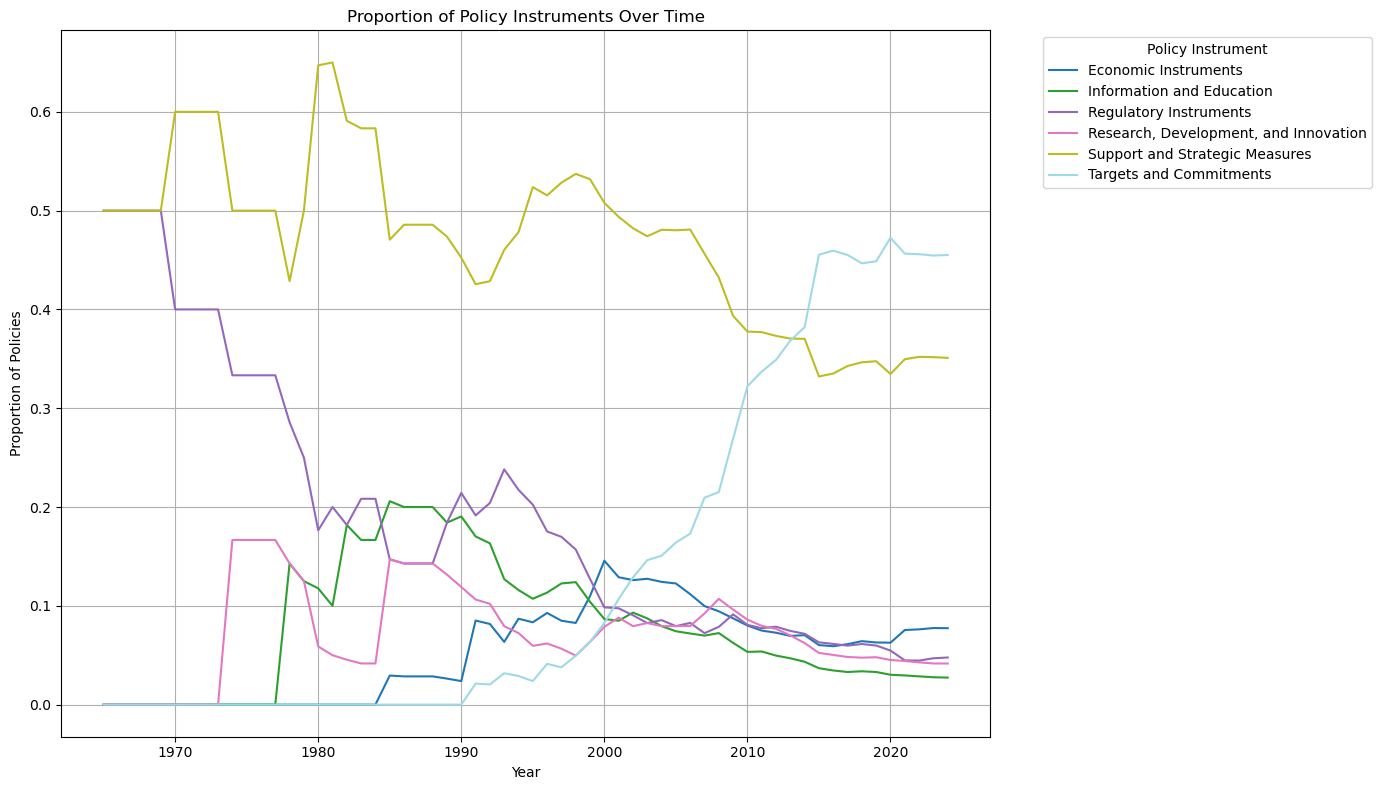

In [43]:
# Proportions Over Time
proportions_over_time = yearly_policy_counts.div(yearly_policy_counts.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
proportions_over_time.plot(kind='line', stacked=False, colormap='tab20', figsize=(14, 8))
plt.title('Proportion of Policy Instruments Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

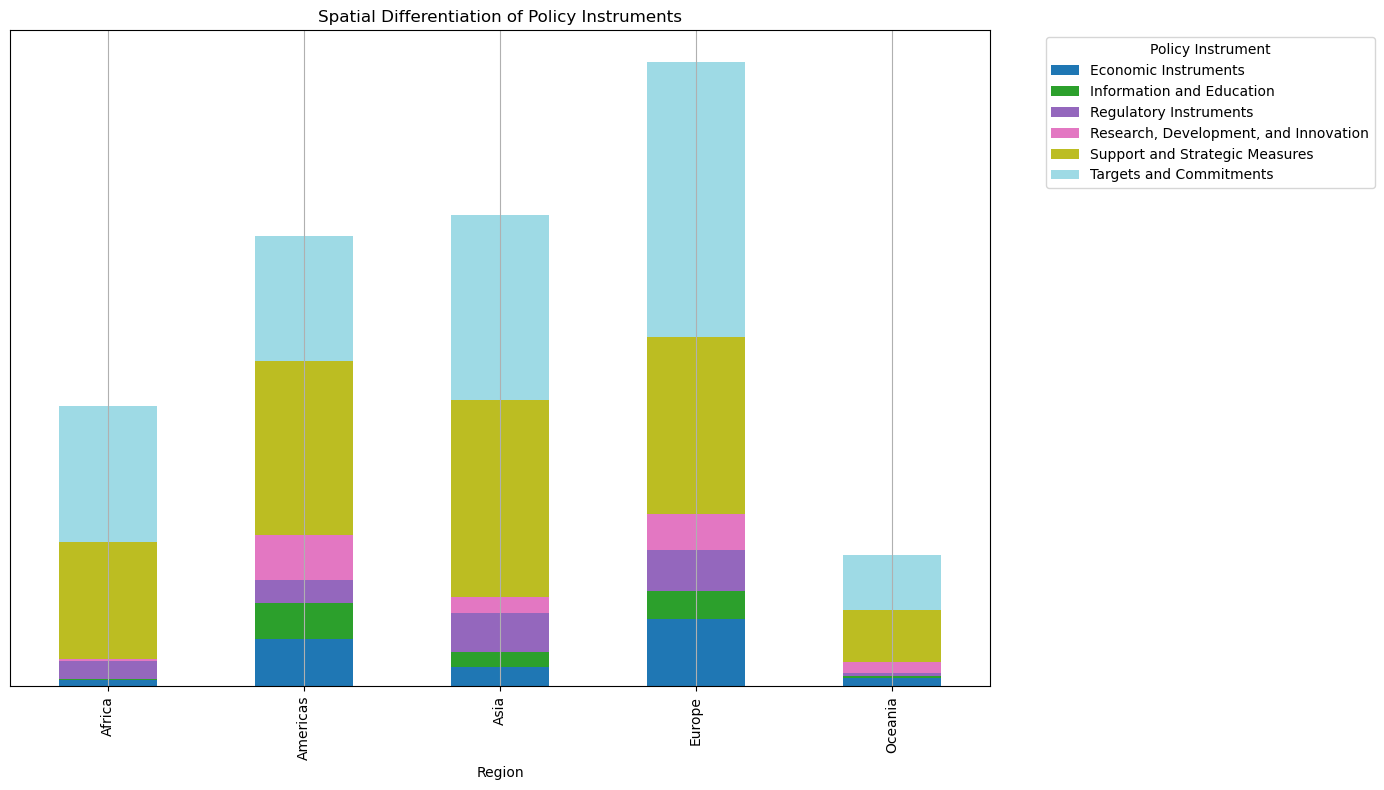

In [44]:
# Spatial Differentiation
region_policy_counts = s_exploded_df.groupby(['region', 'policy_instrument_group']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
region_policy_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Spatial Differentiation of Policy Instruments')
plt.xlabel('Region')
plt.ylabel('Number of Policies')
plt.legend(title='Policy Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis
plt.tight_layout()
plt.show()